### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
111,2020-06-22,49,97,247,35,69,317,3026,234,145,22,247,40,11,52,0,17,4608
112,2020-06-23,23,87,283,29,57,286,2469,175,149,14,170,18,4,29,0,11,3804
113,2020-06-24,30,62,236,38,54,286,2350,249,153,24,136,10,4,17,0,0,3649
114,2020-06-25,38,73,288,52,98,295,3035,258,175,14,238,27,12,22,1,22,4648
115,2020-06-26,37,135,227,50,69,315,2616,268,181,41,256,41,11,36,1,12,4296


In [3]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
111,2020-06-22,1420,5355,6708,718,2428,9615,198392,4186,4355,2181,5158,3009,621,1437,28,1352,246963
112,2020-06-23,1443,5442,6991,747,2485,9901,200861,4361,4504,2195,5328,3027,625,1466,28,1363,250767
113,2020-06-24,1473,5504,7227,785,2539,10187,203211,4610,4657,2219,5464,3037,629,1483,28,1363,254416
114,2020-06-25,1511,5577,7515,837,2637,10482,206246,4868,4832,2233,5702,3064,641,1505,29,1385,259064
115,2020-06-26,1549,5712,7742,887,2705,10797,208862,5136,5013,2274,5958,3105,652,1541,30,1397,263360


## Nuevos contagios por día vs contagios totales

In [4]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

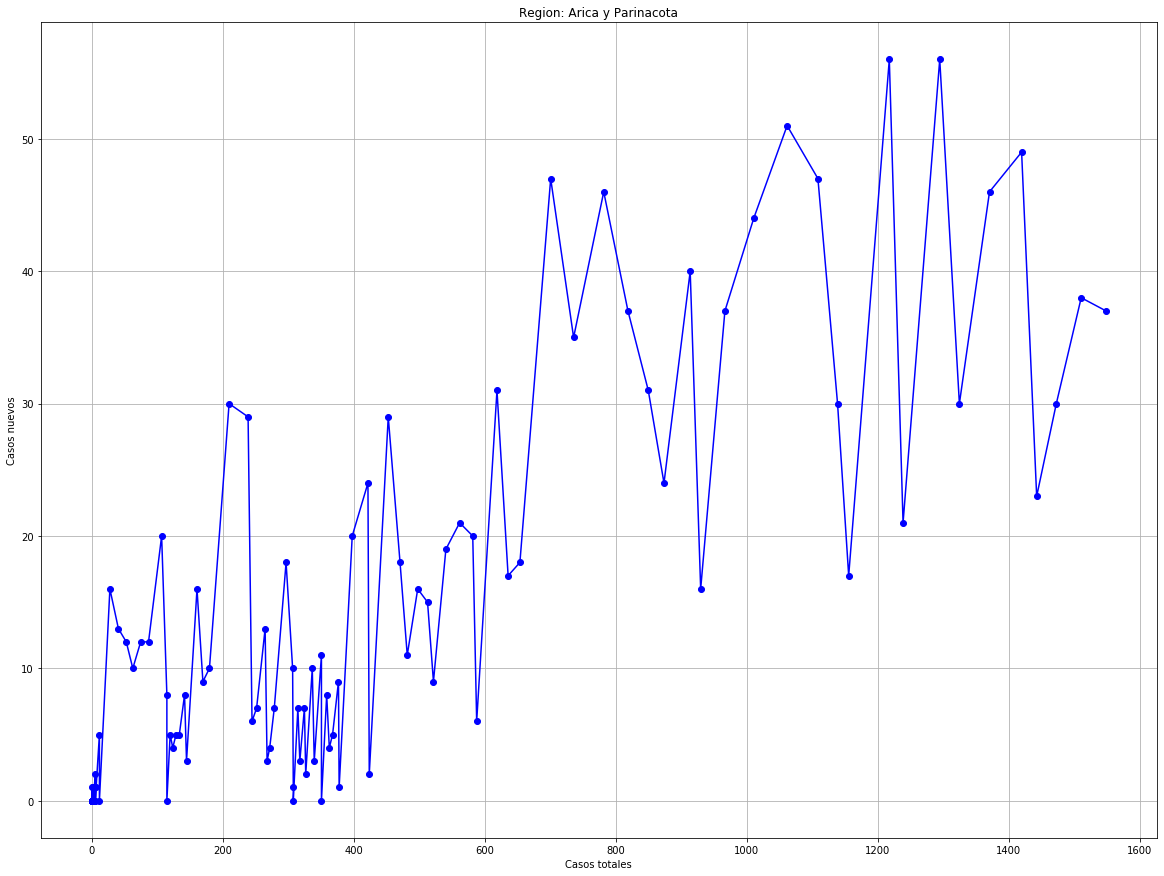

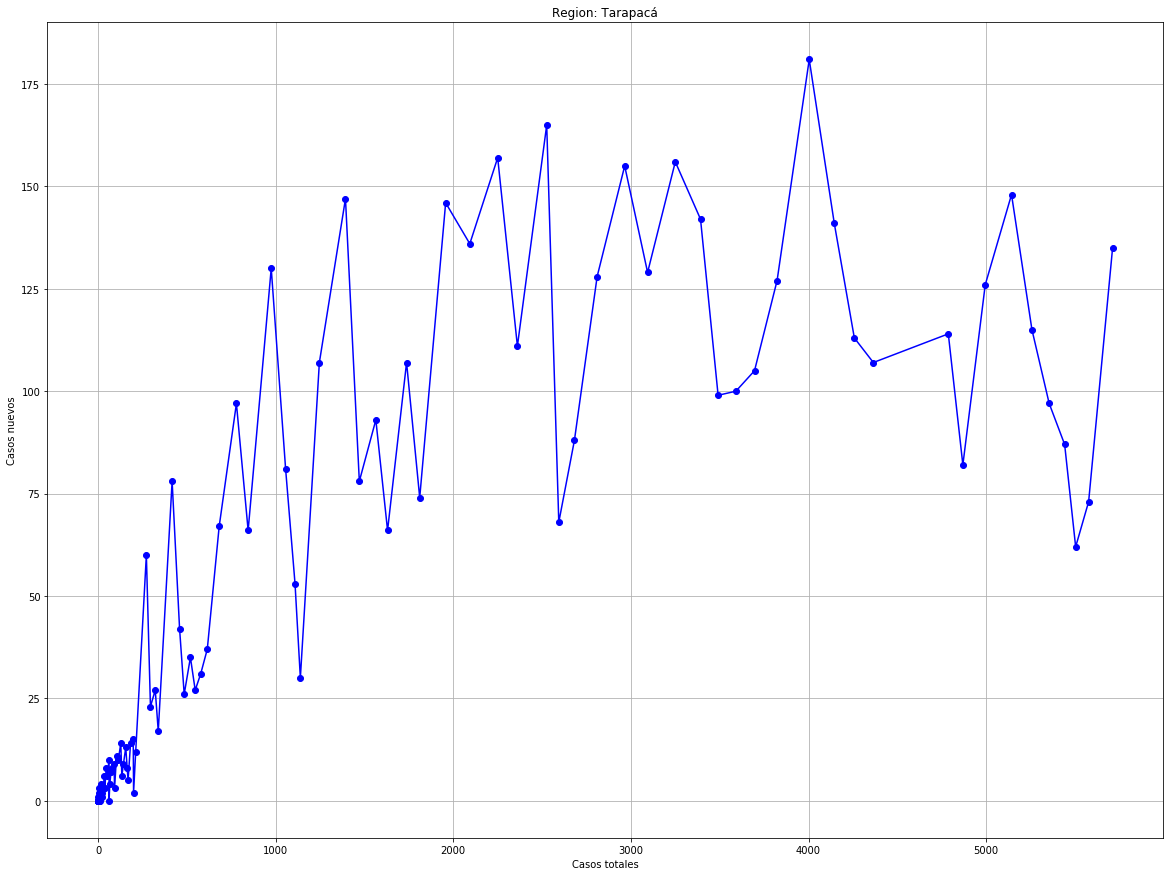

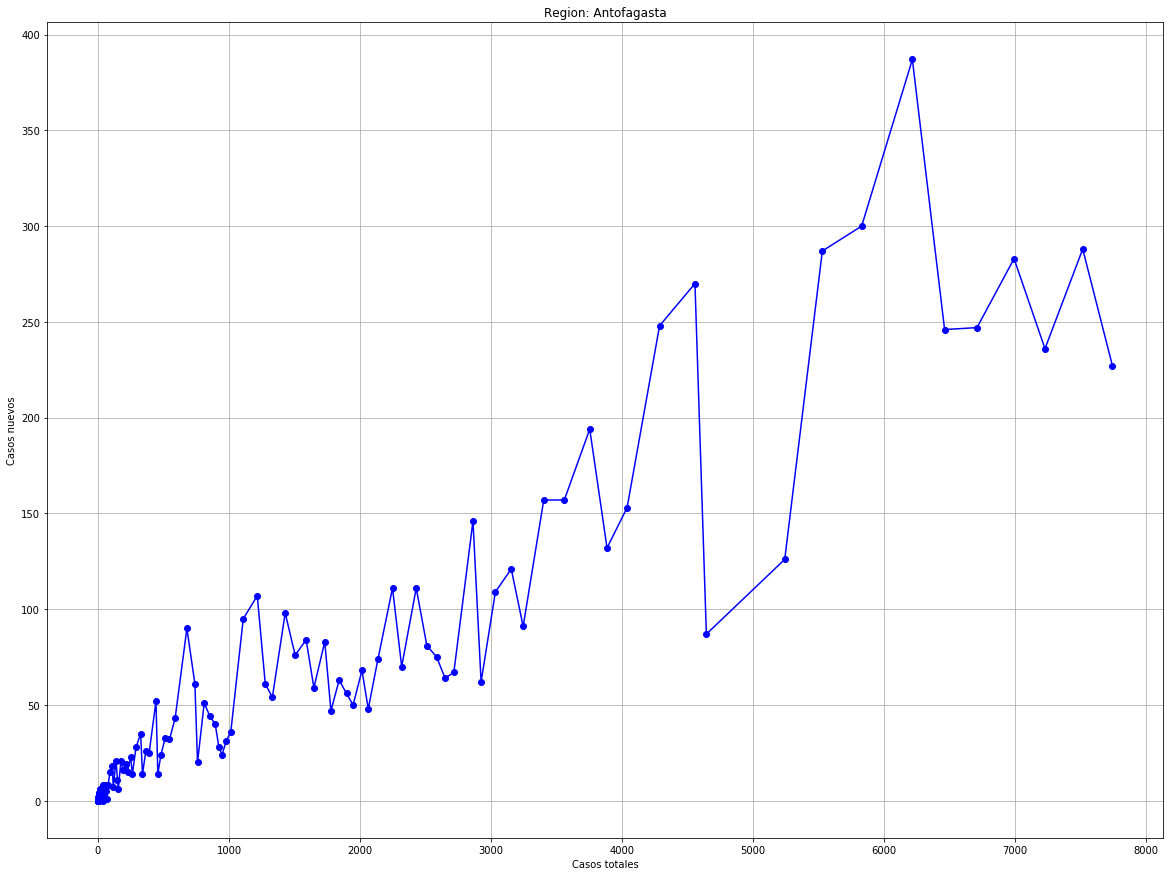

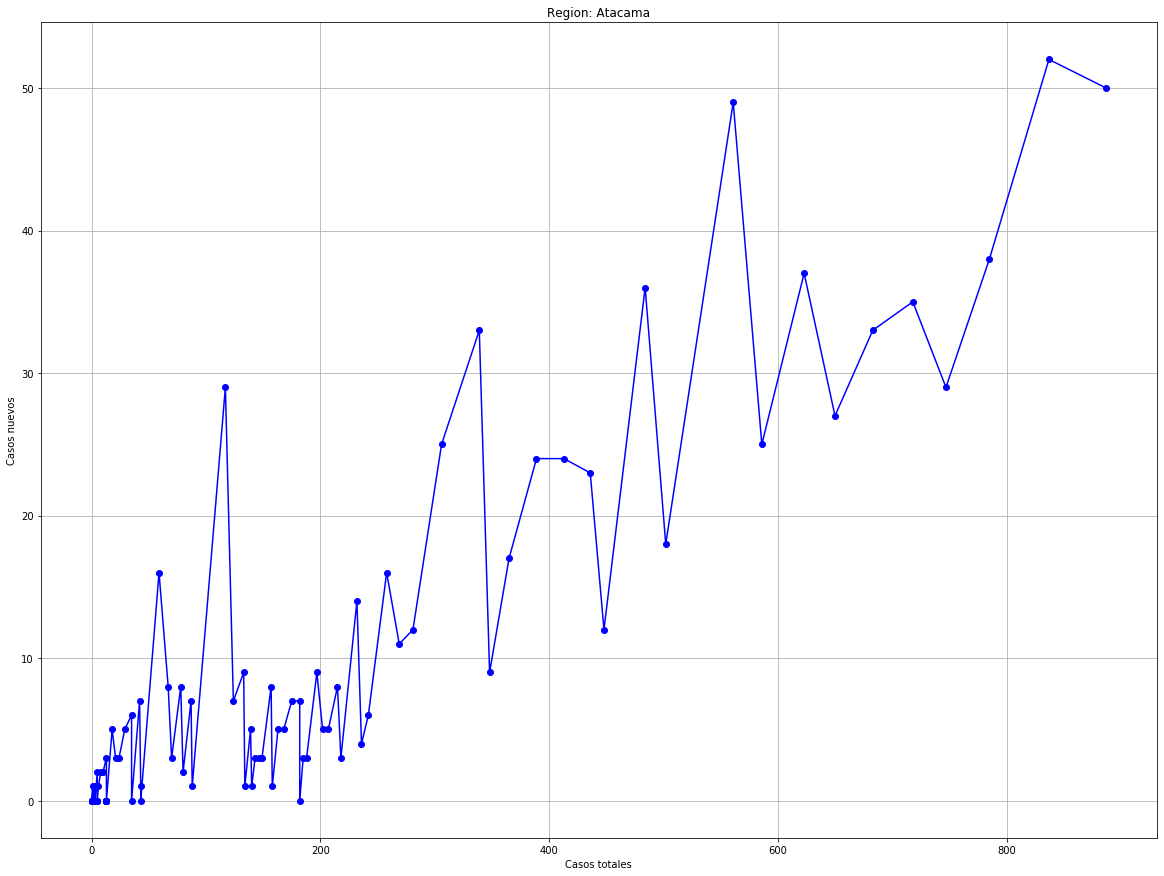

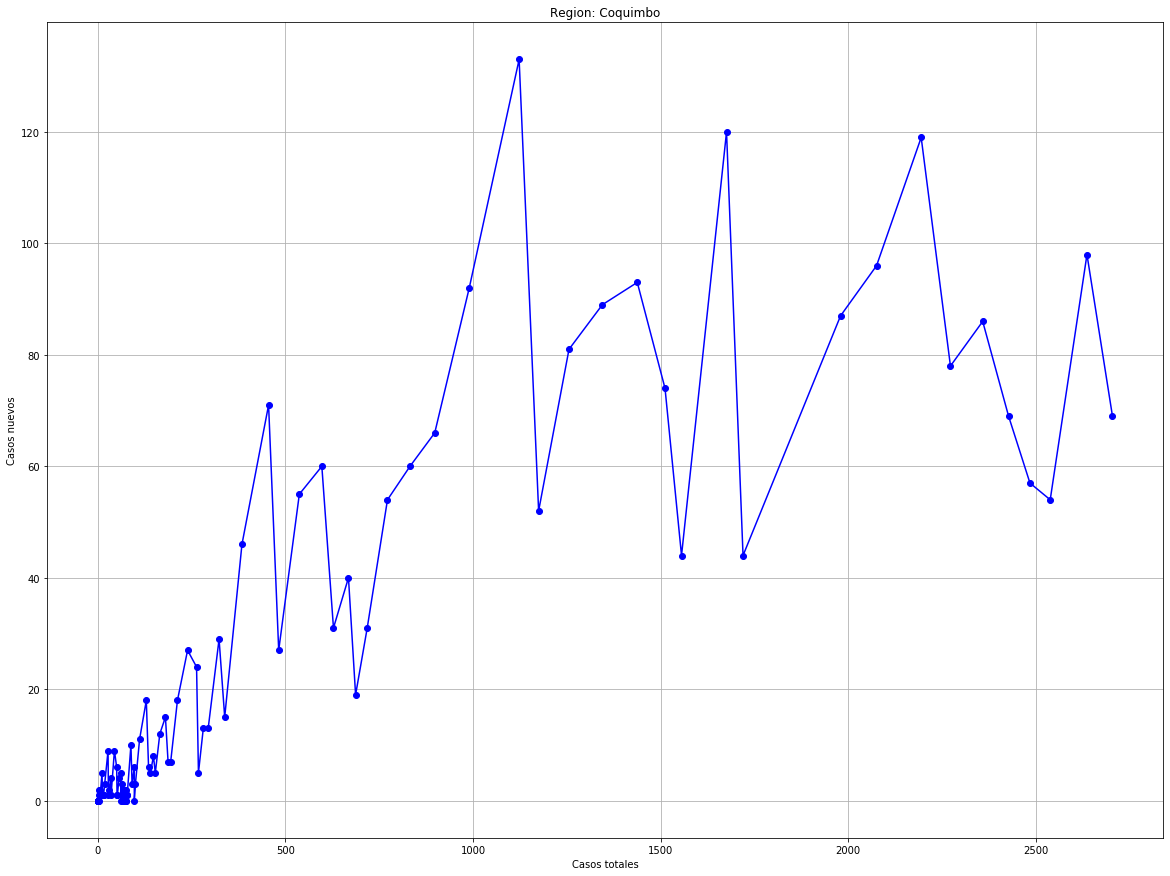

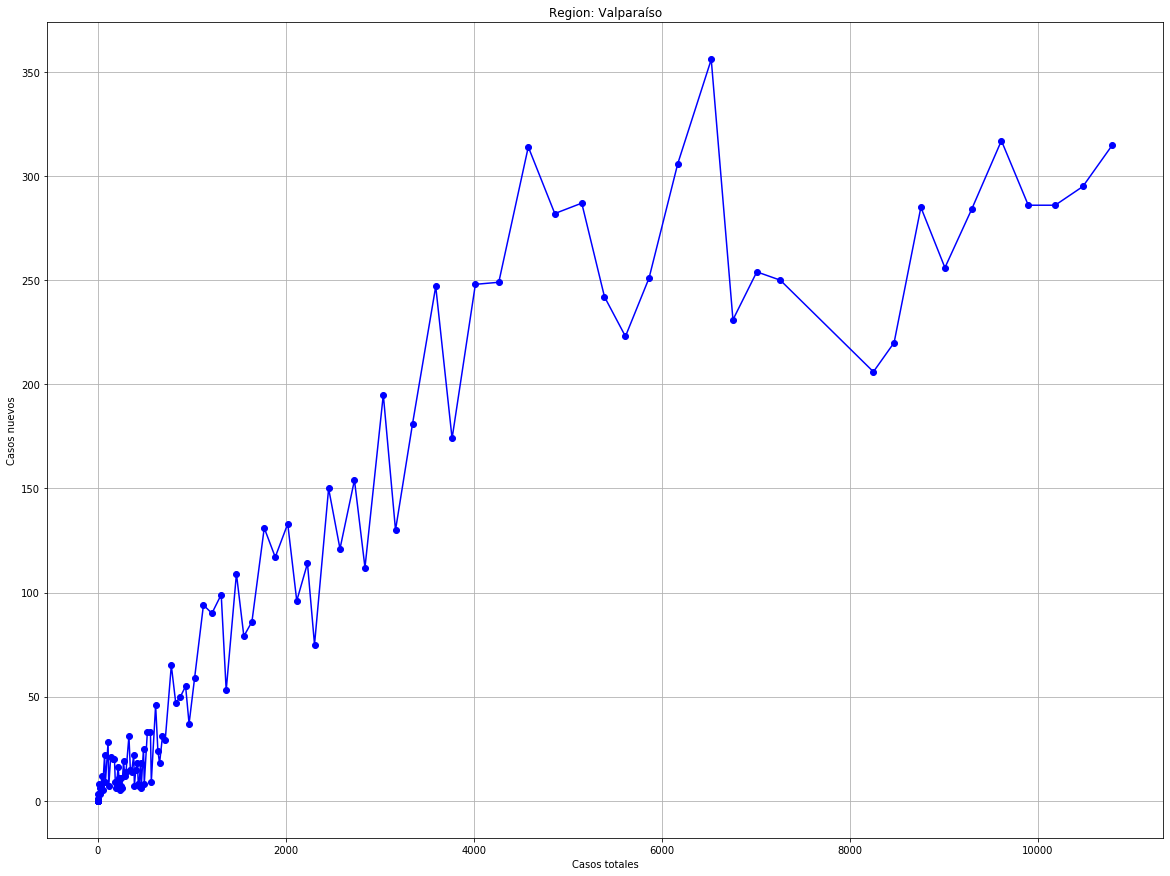

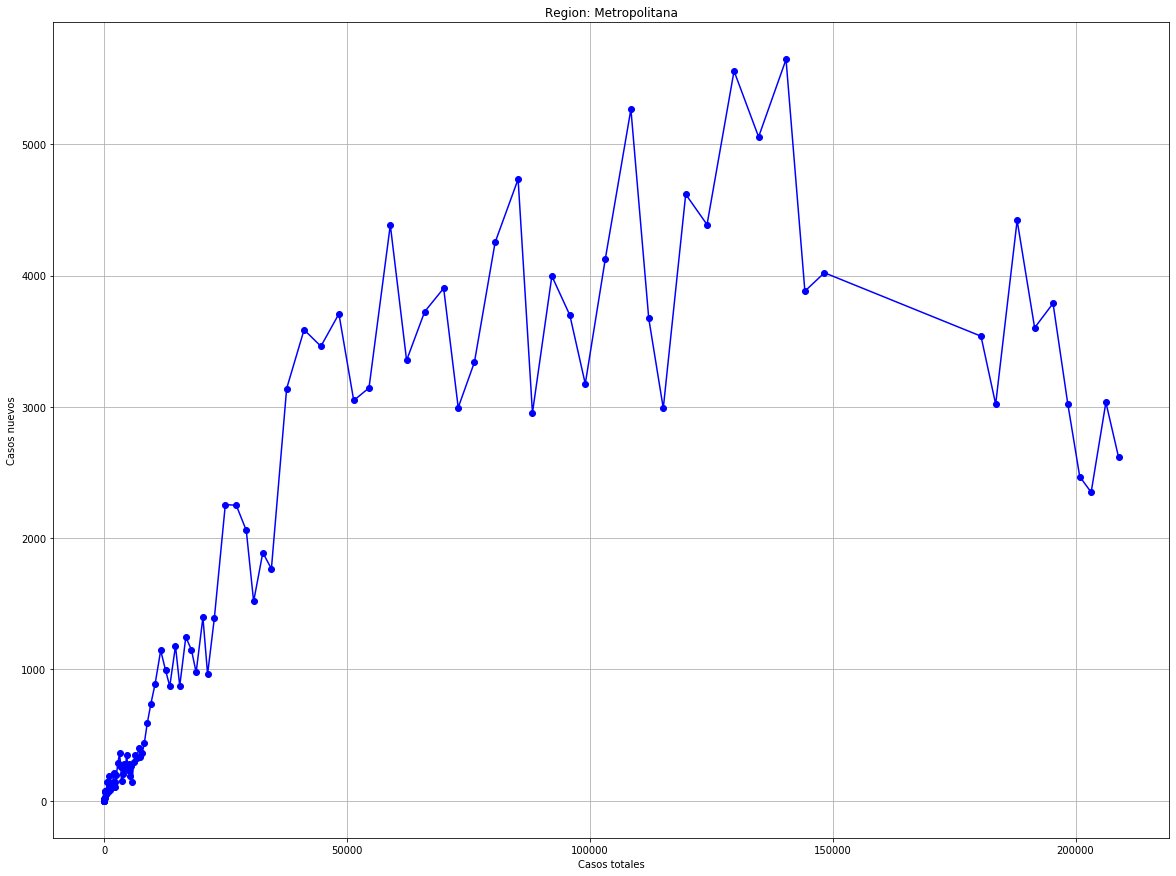

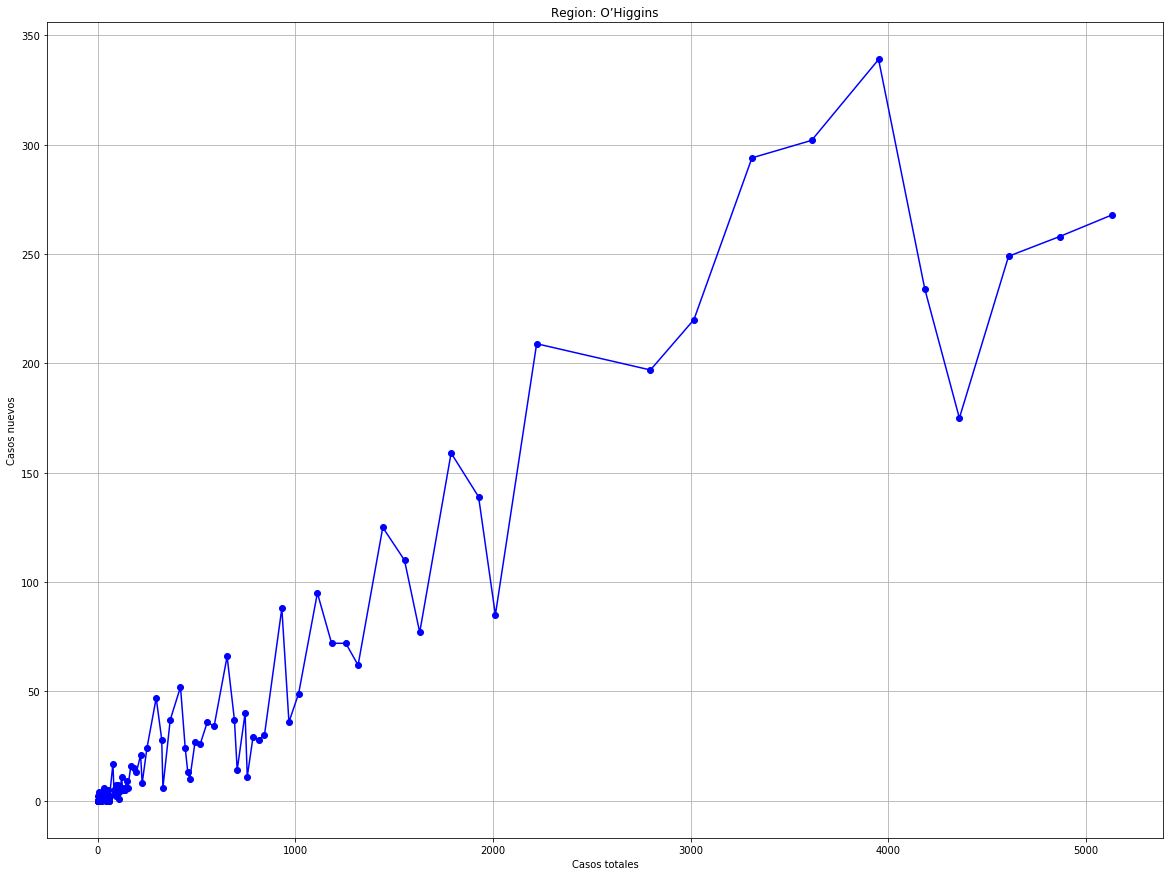

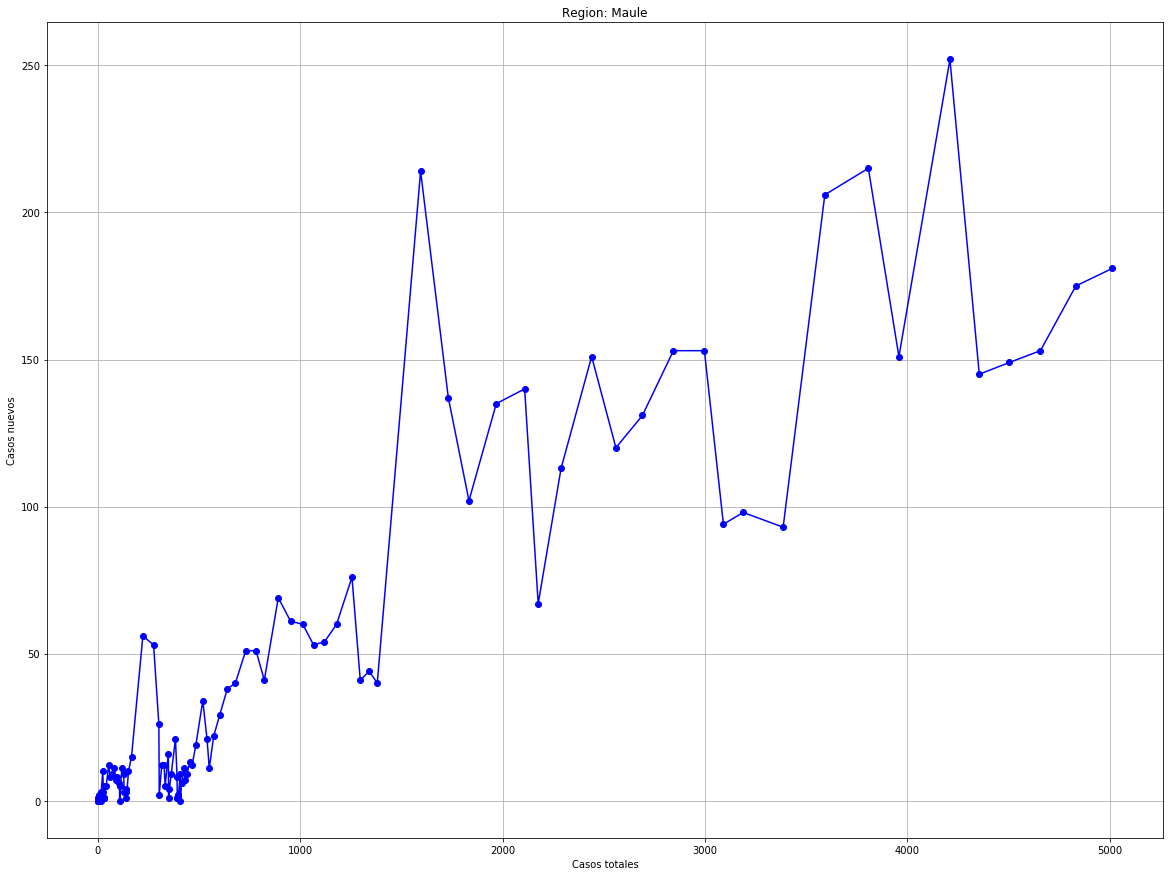

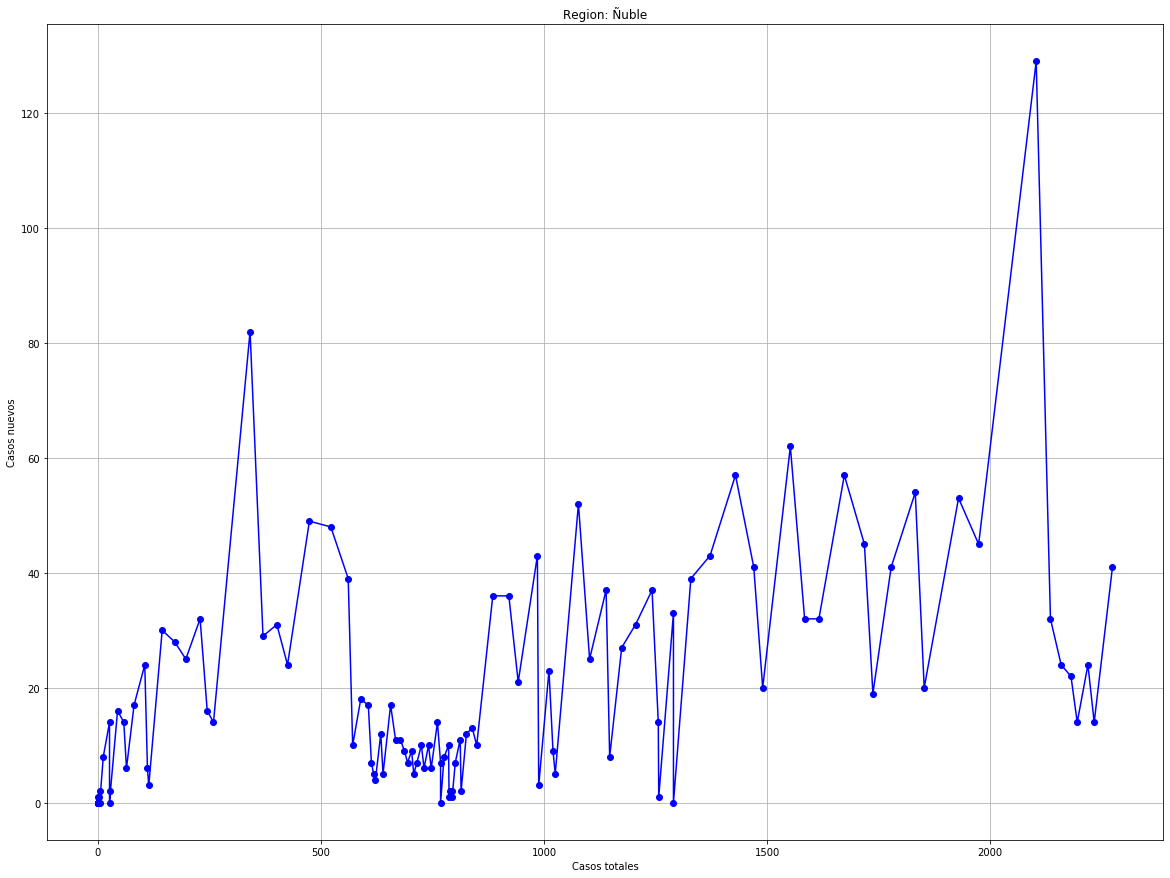

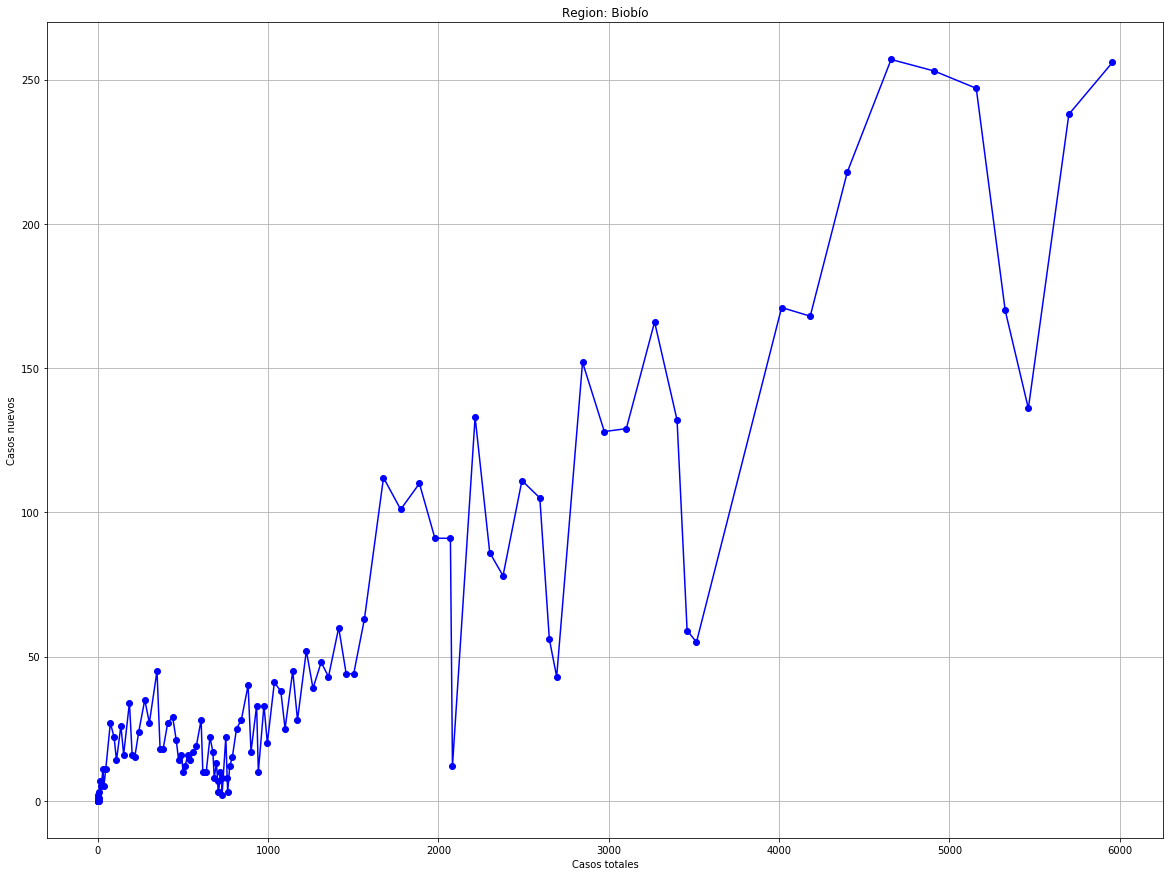

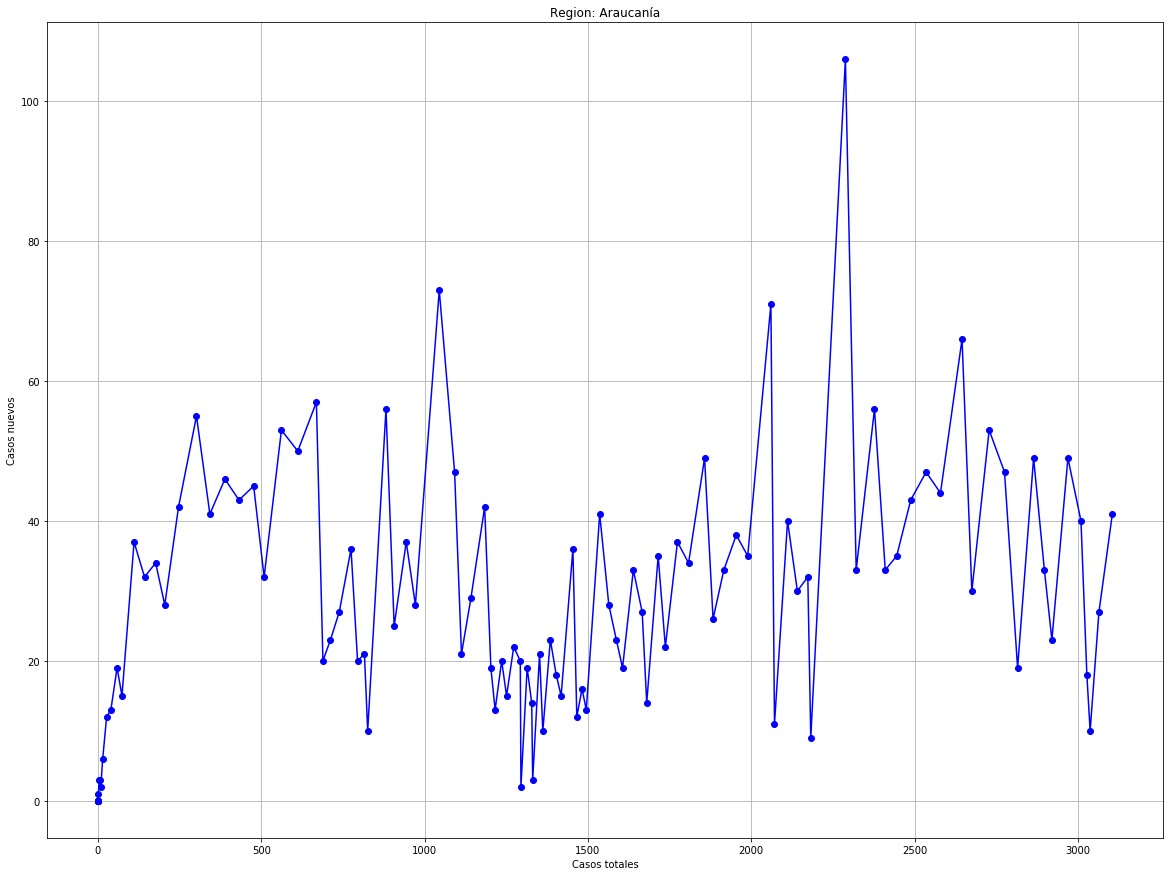

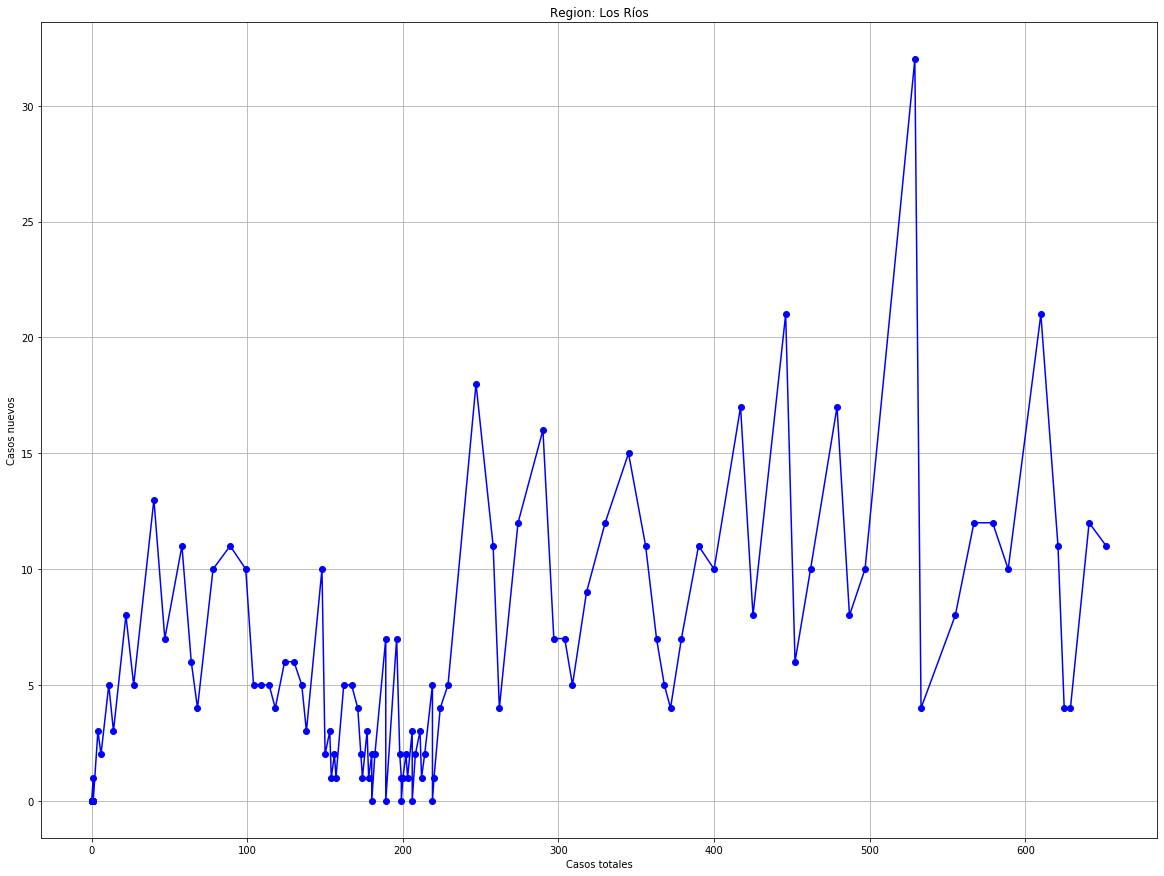

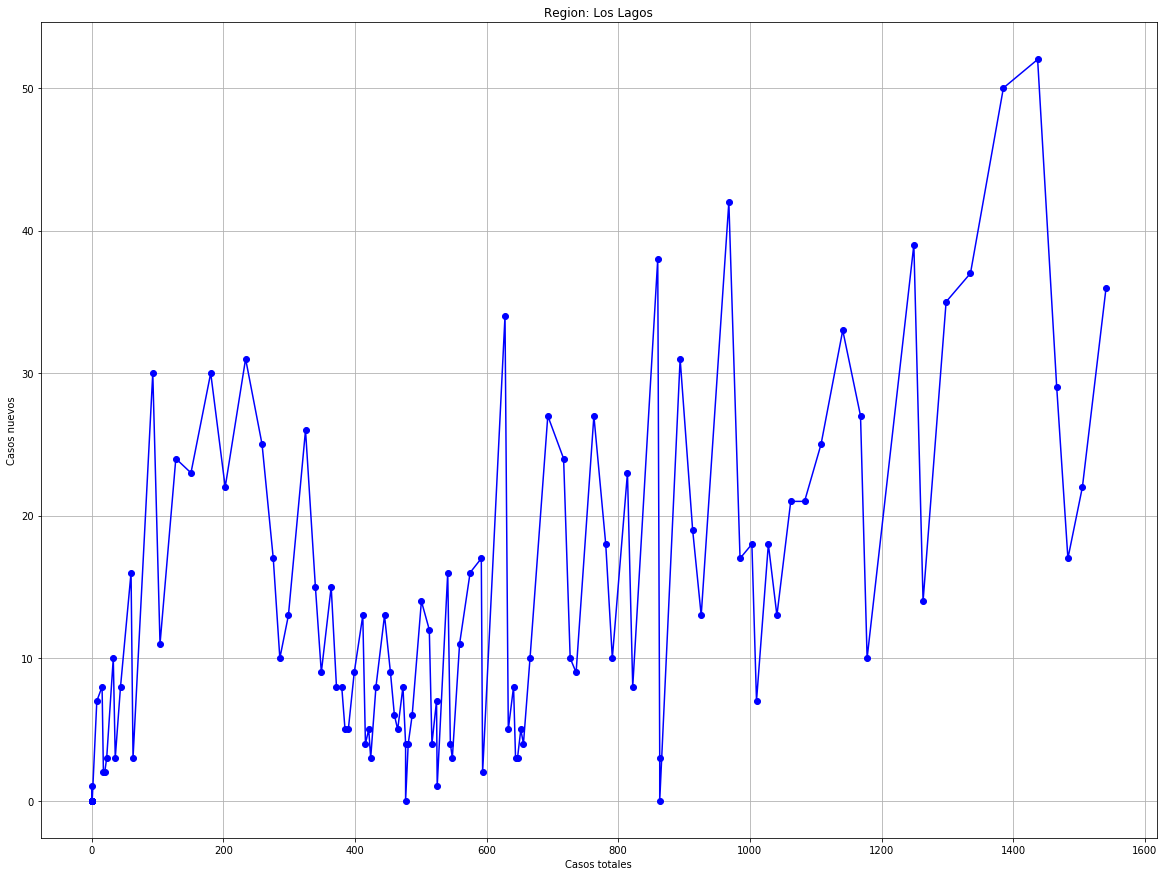

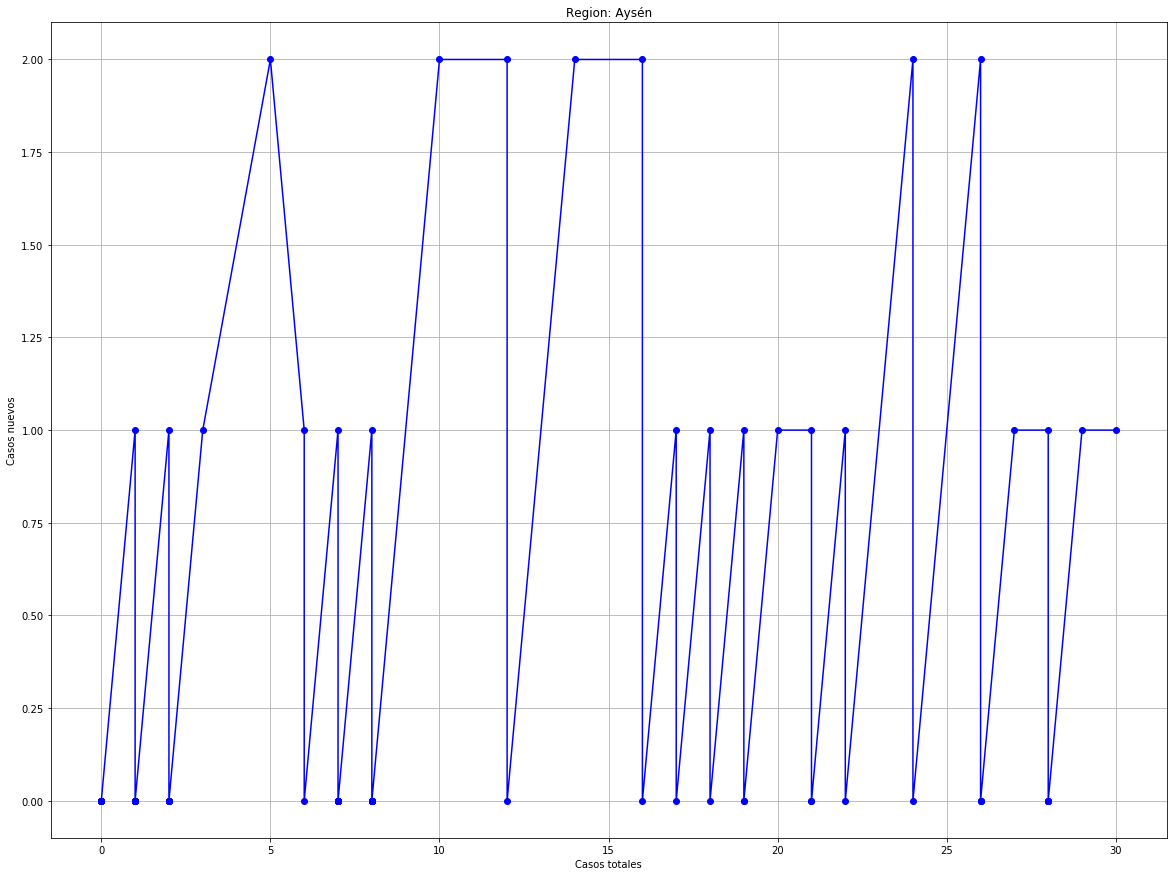

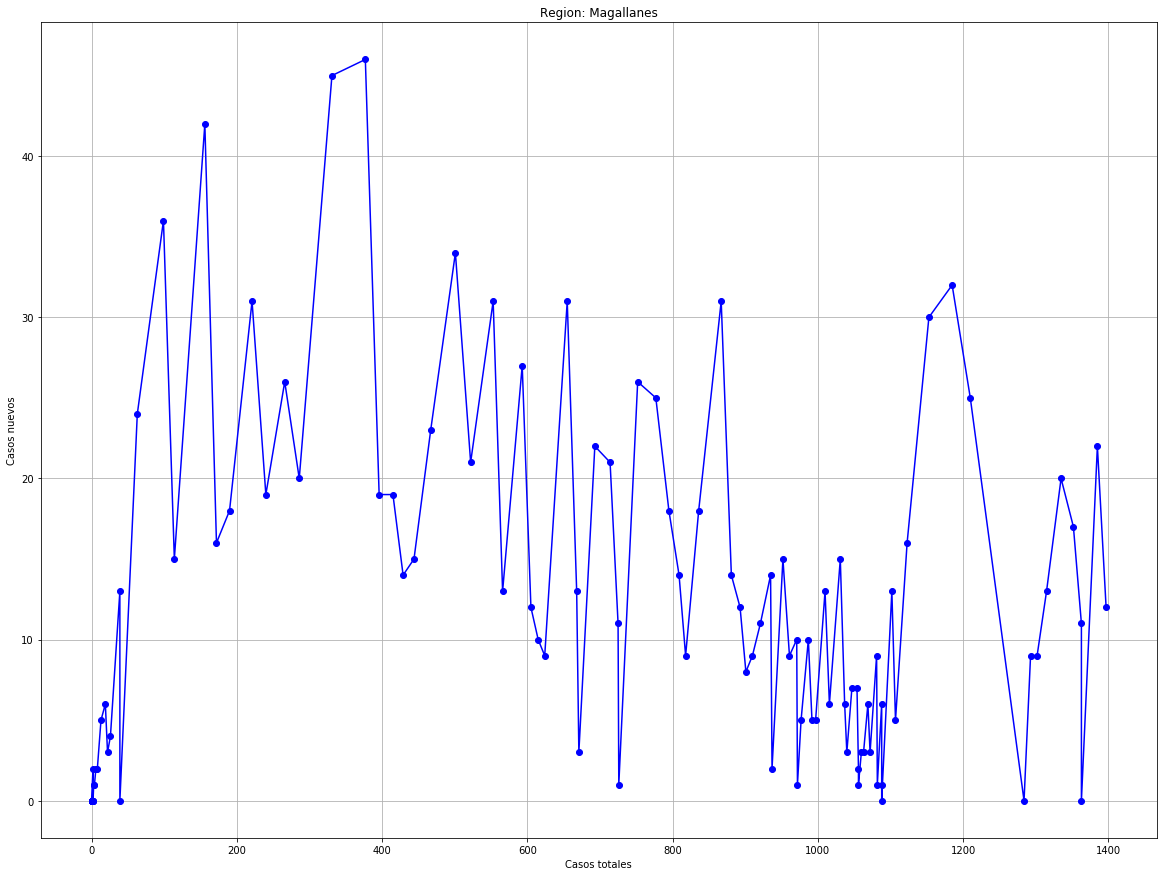

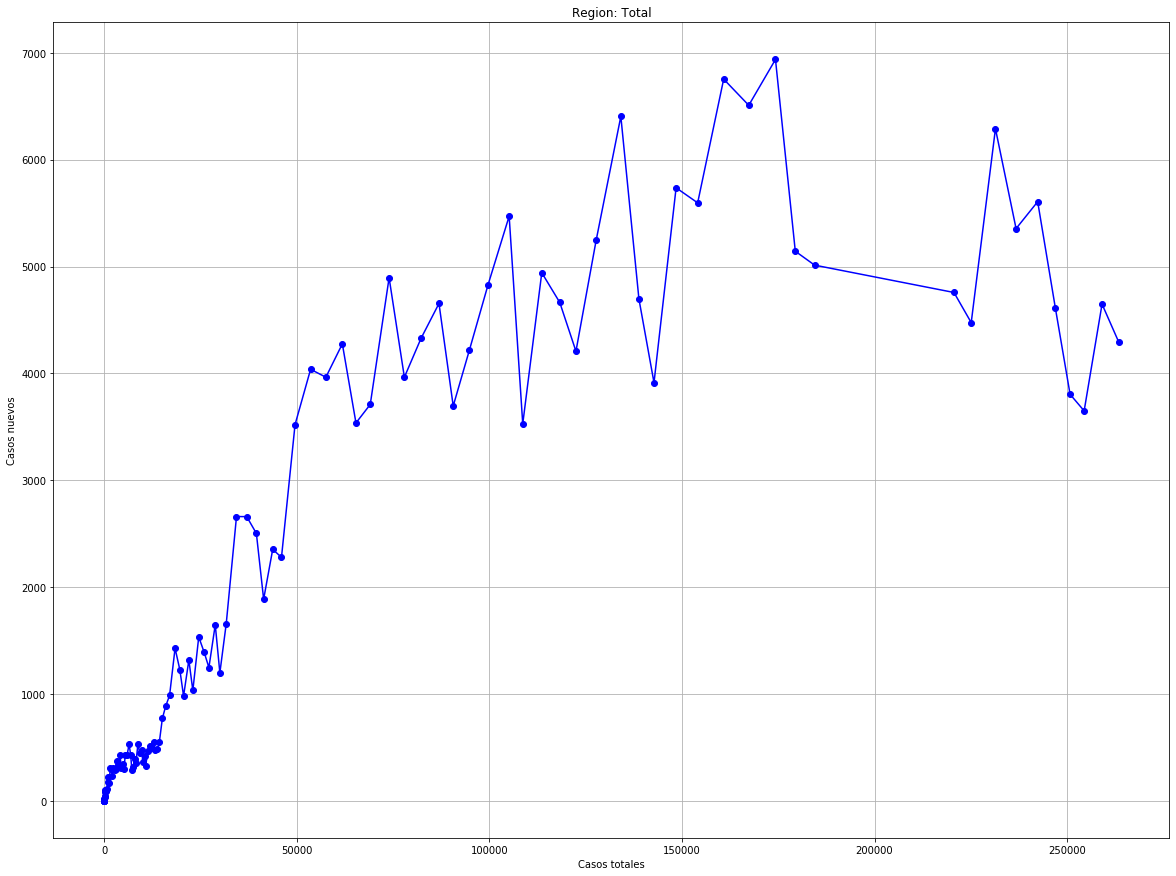

In [6]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [7]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…

## Nuevos contagios por días

In [7]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom',
            size = '15')
        
def graph_for_days(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(fechas, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Casos nuevos')
    labelonbars(fechas, casos_nuevos)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xticks(fechas, rotation='vertical')
    plt.show()

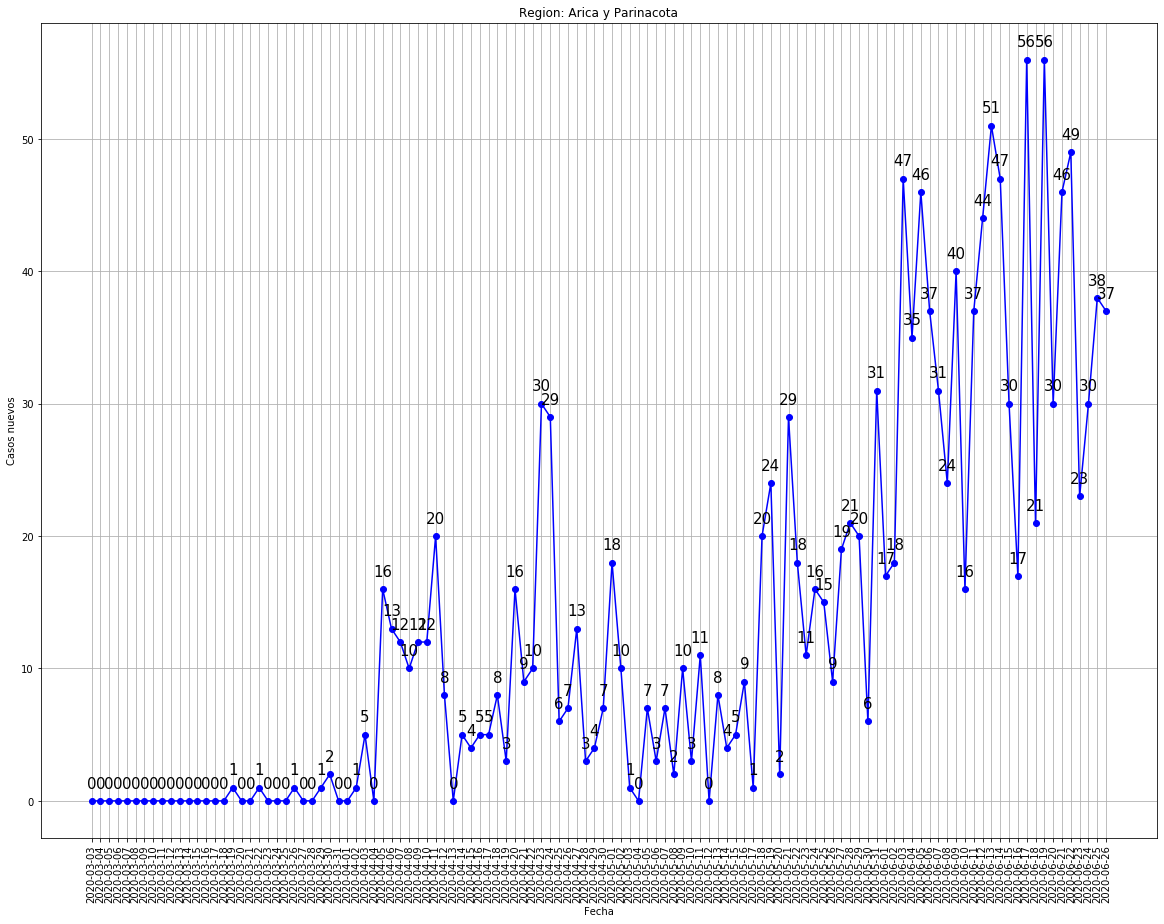

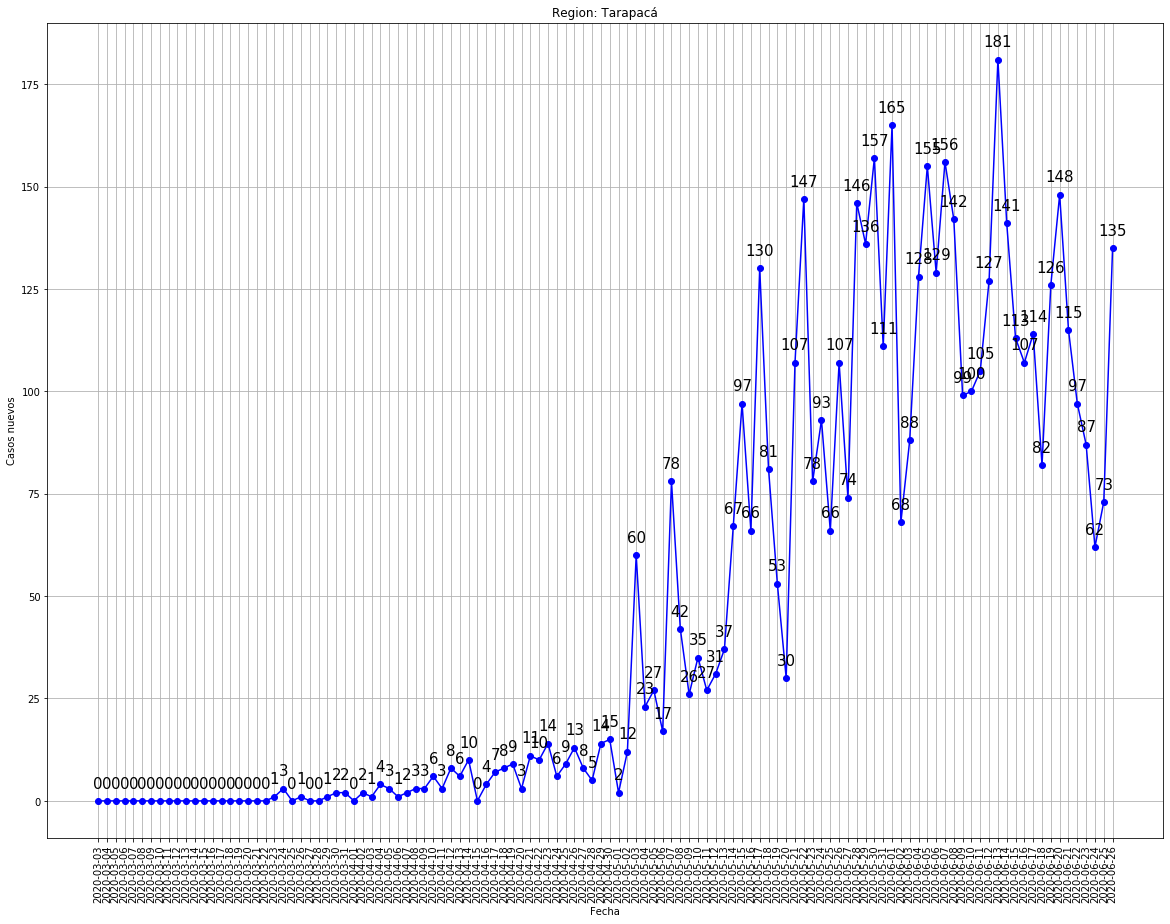

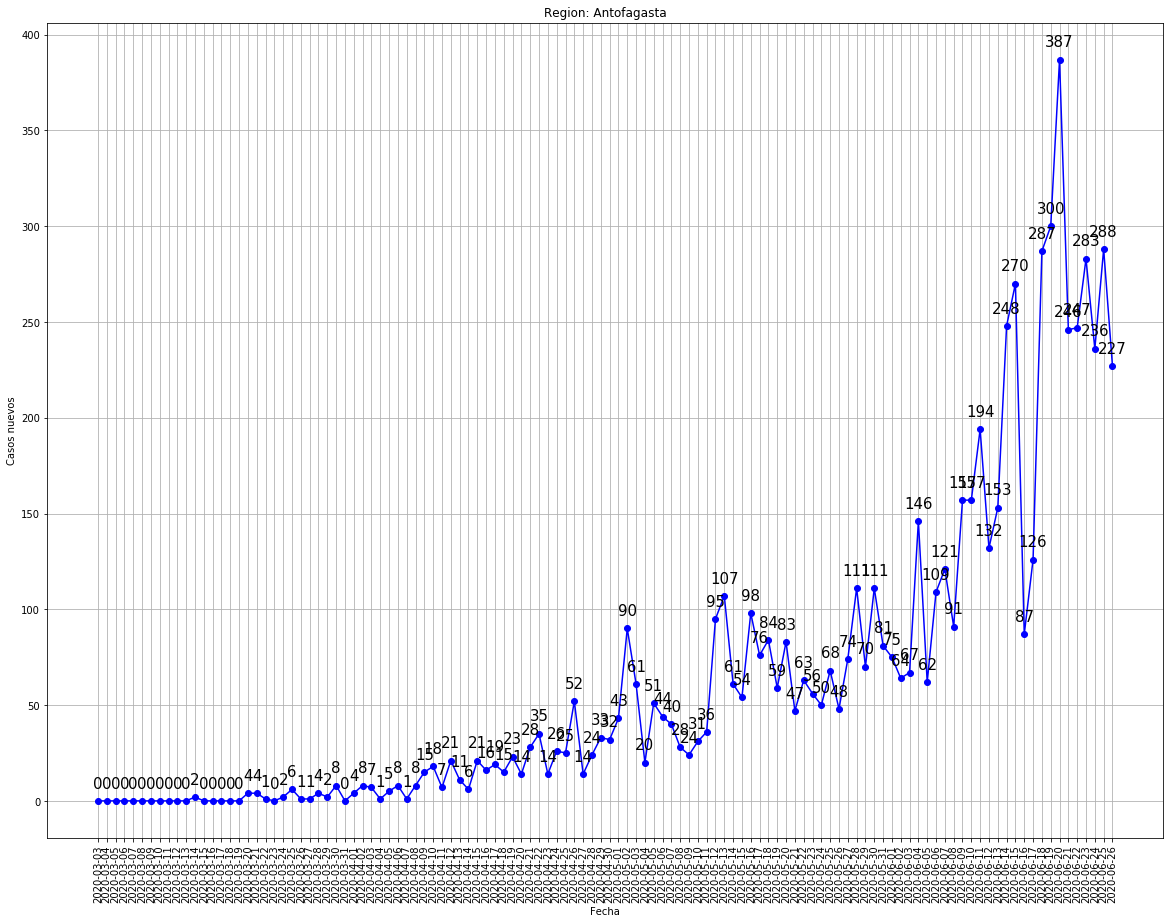

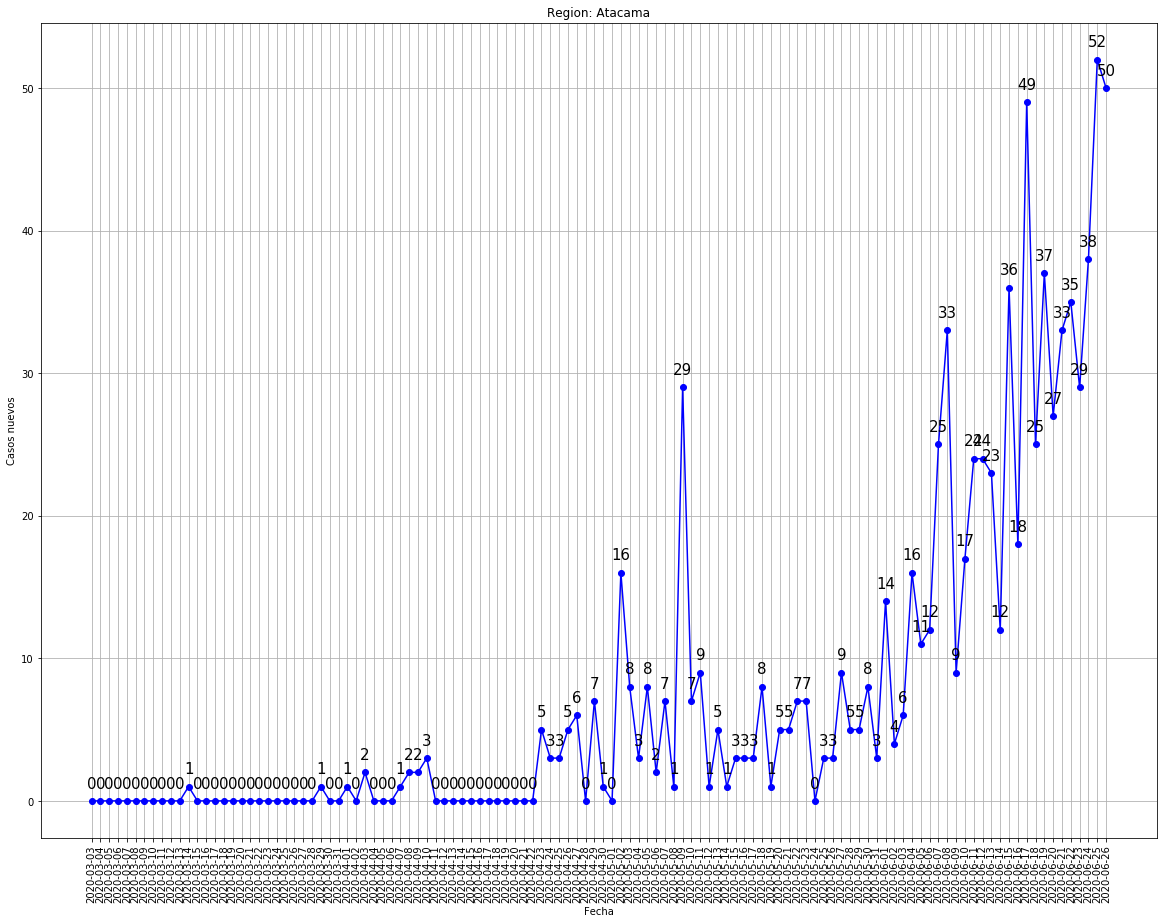

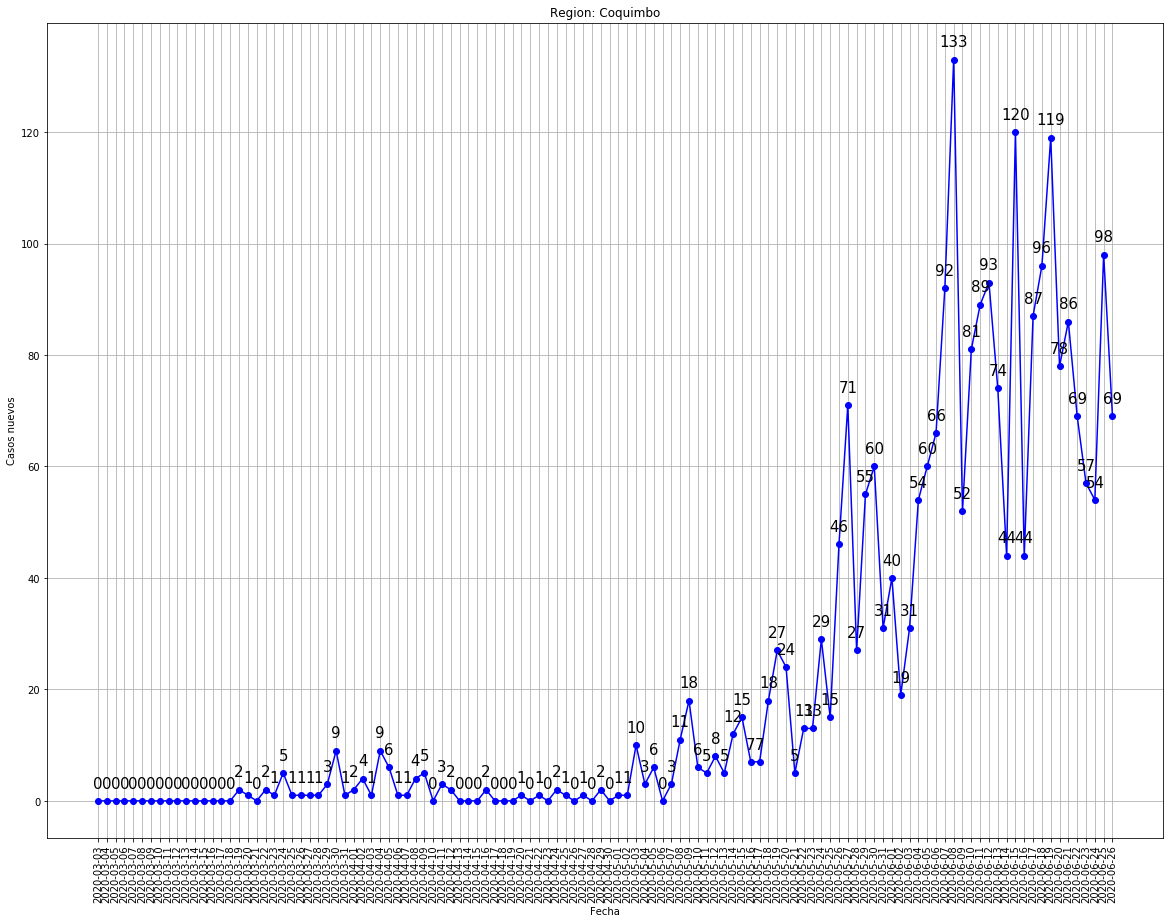

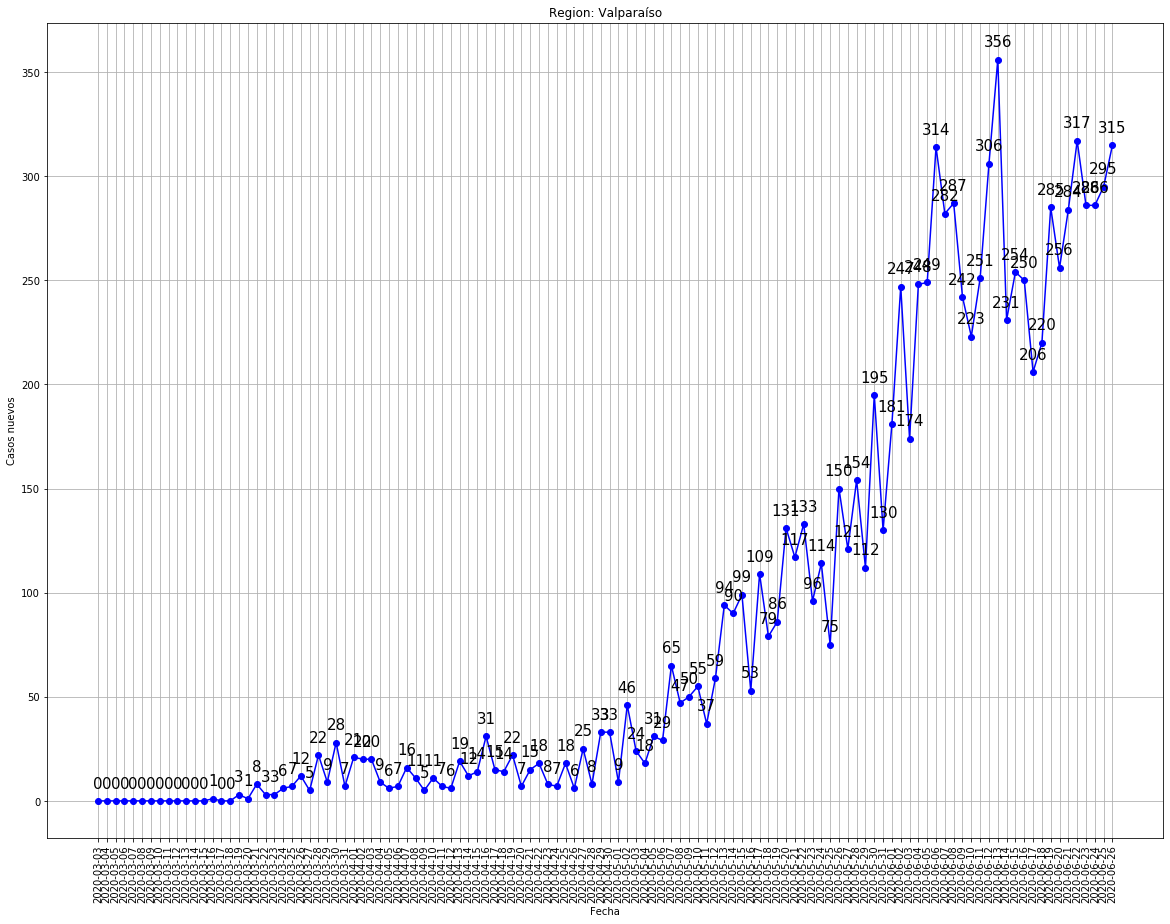

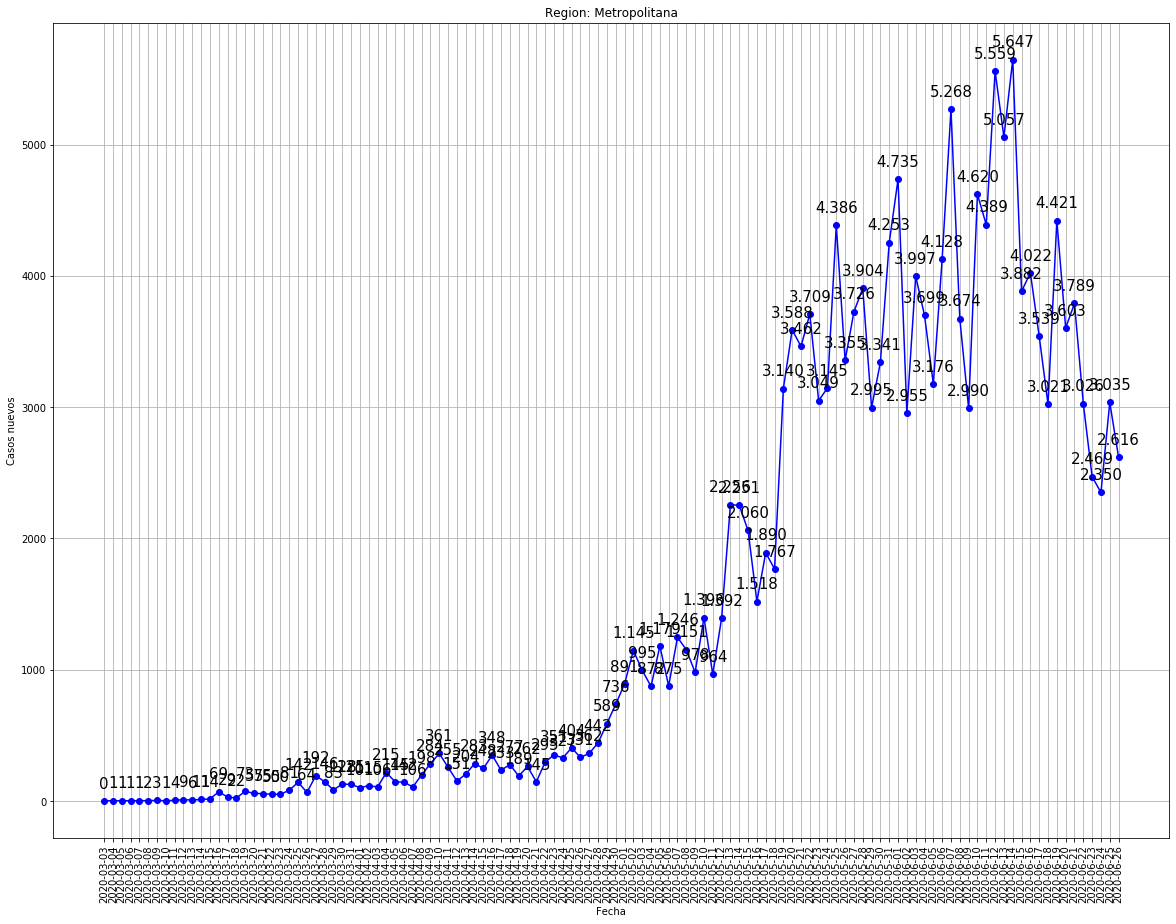

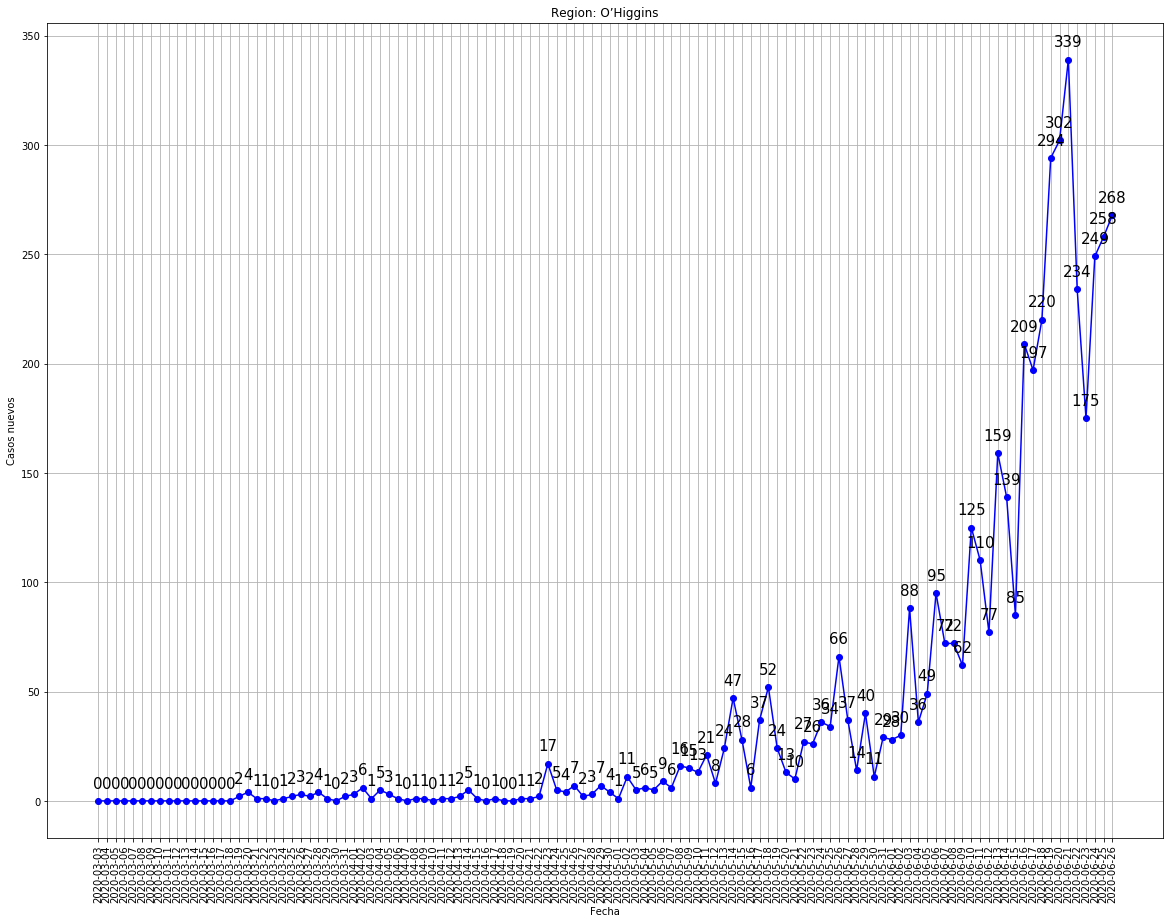

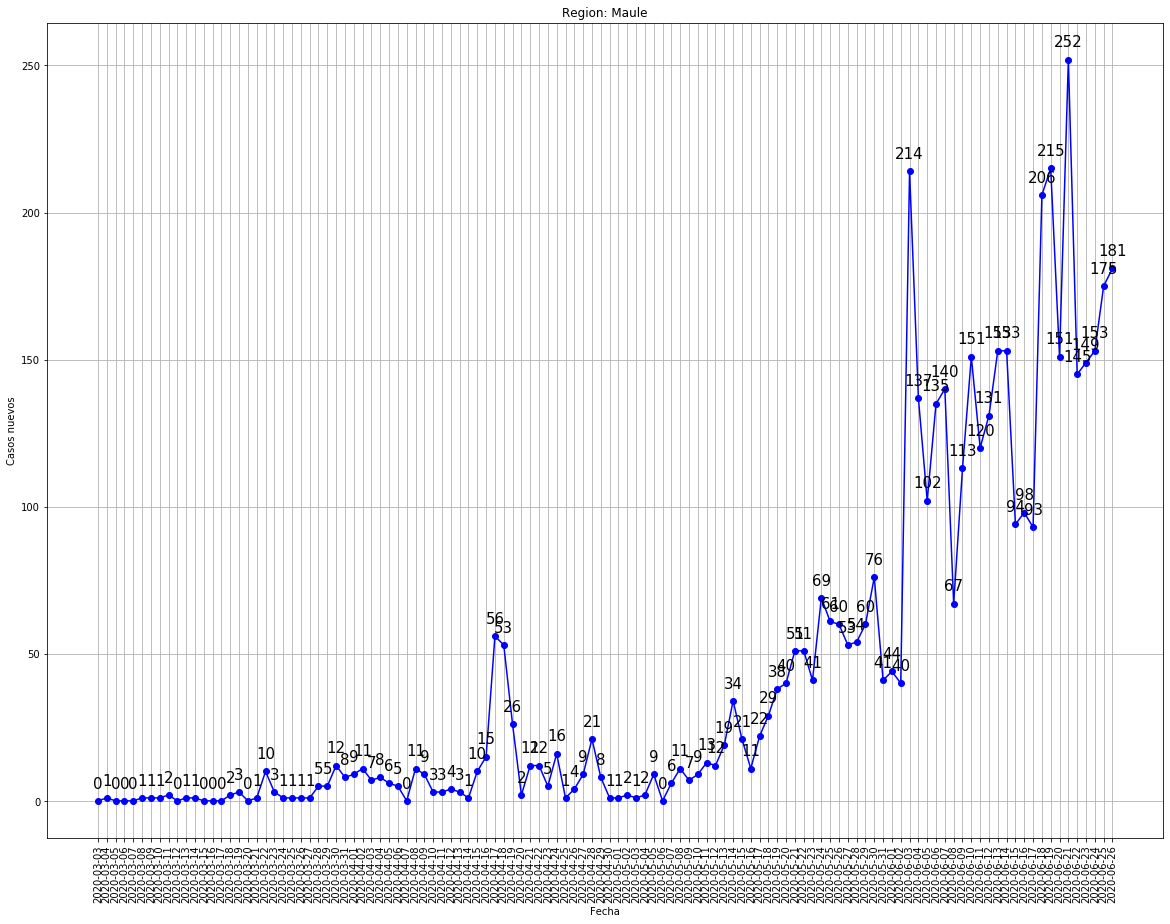

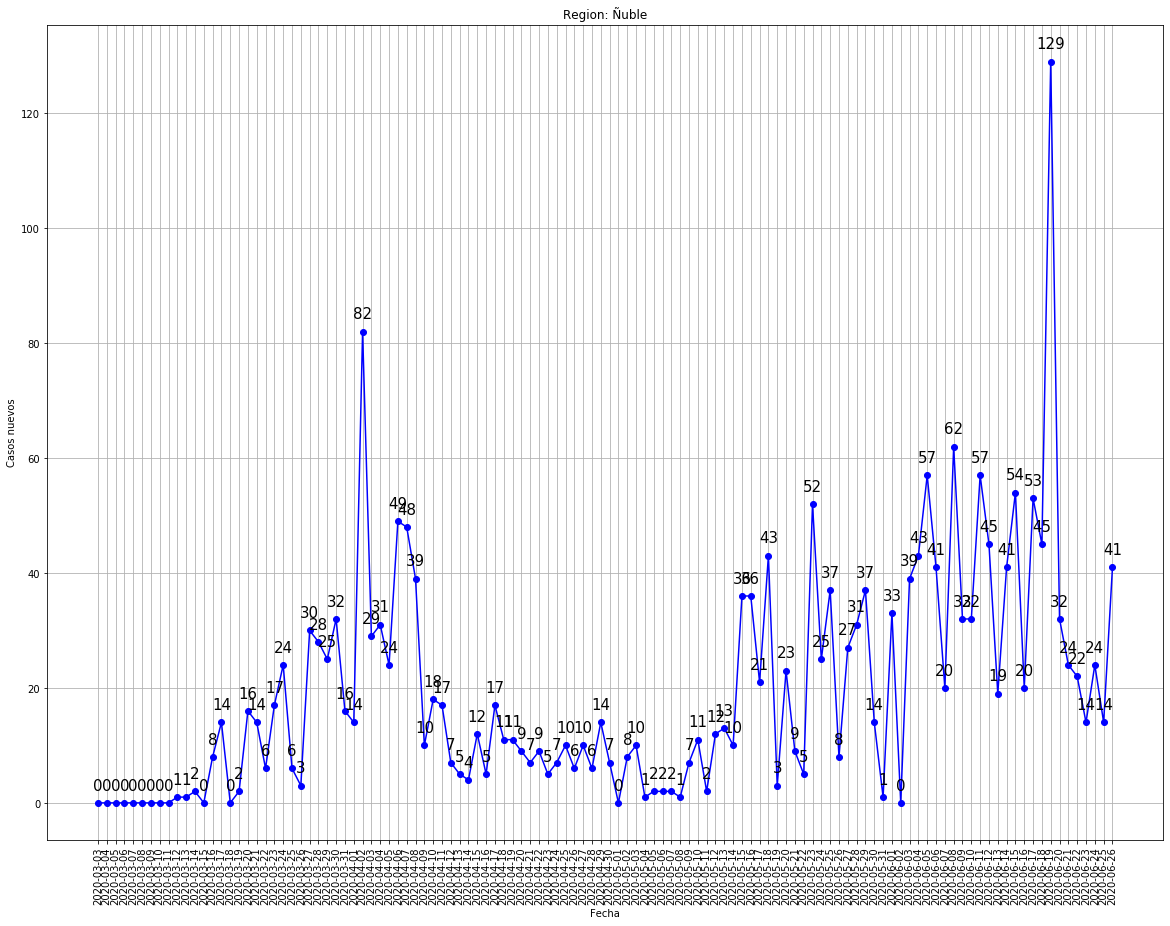

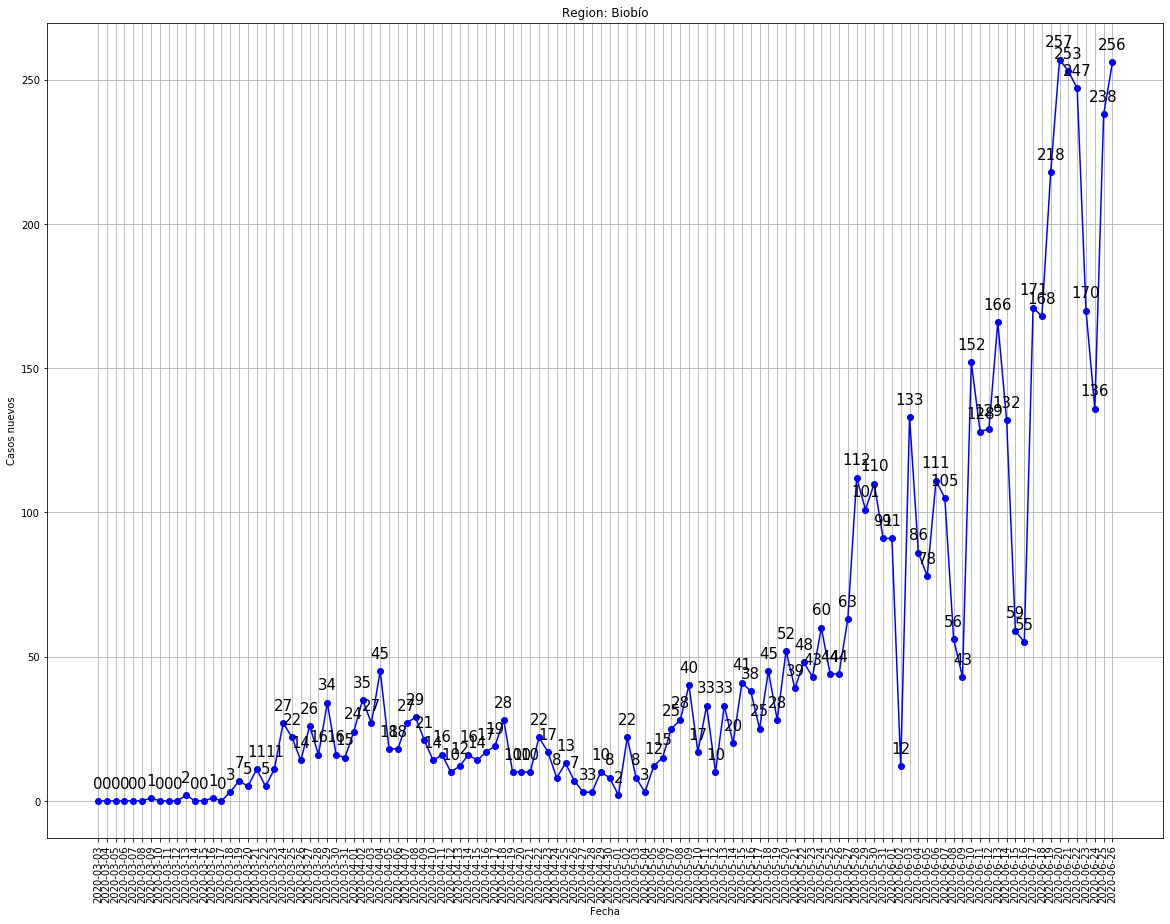

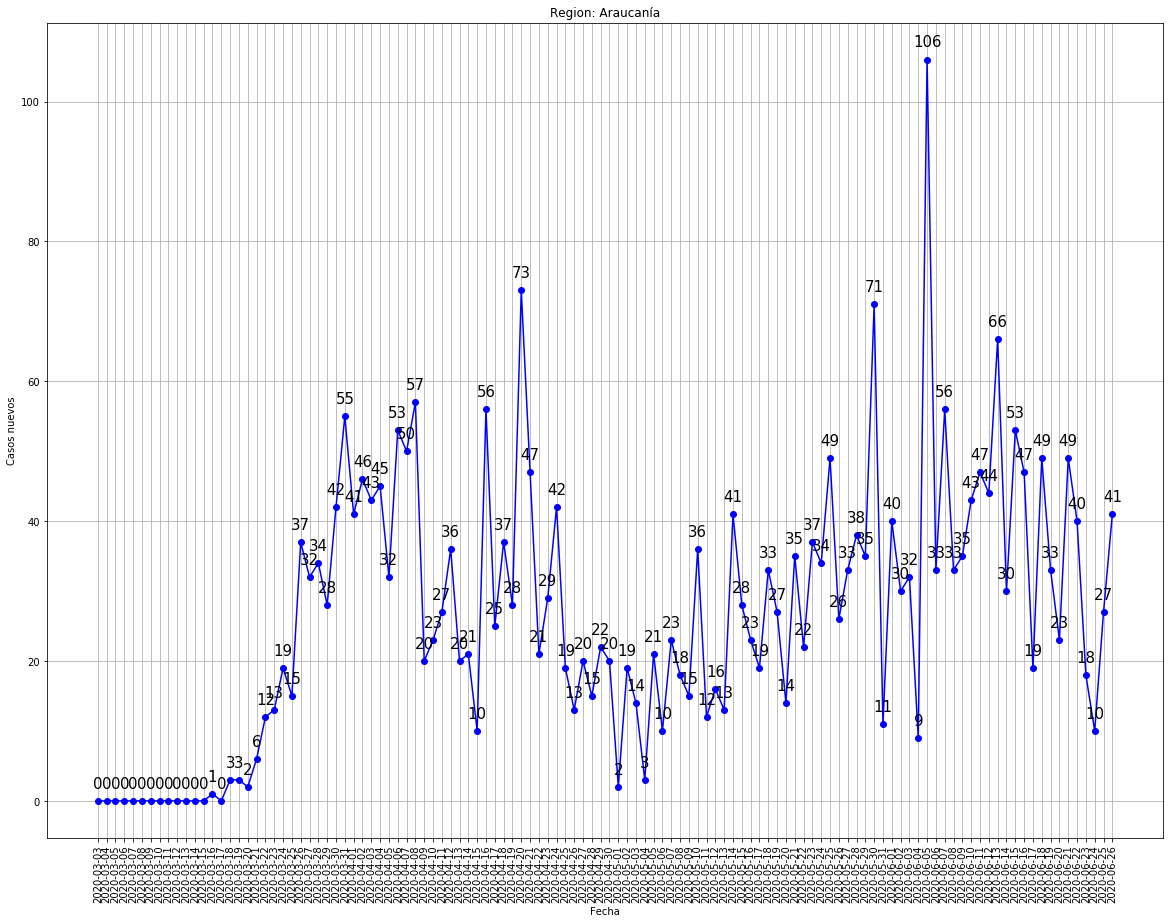

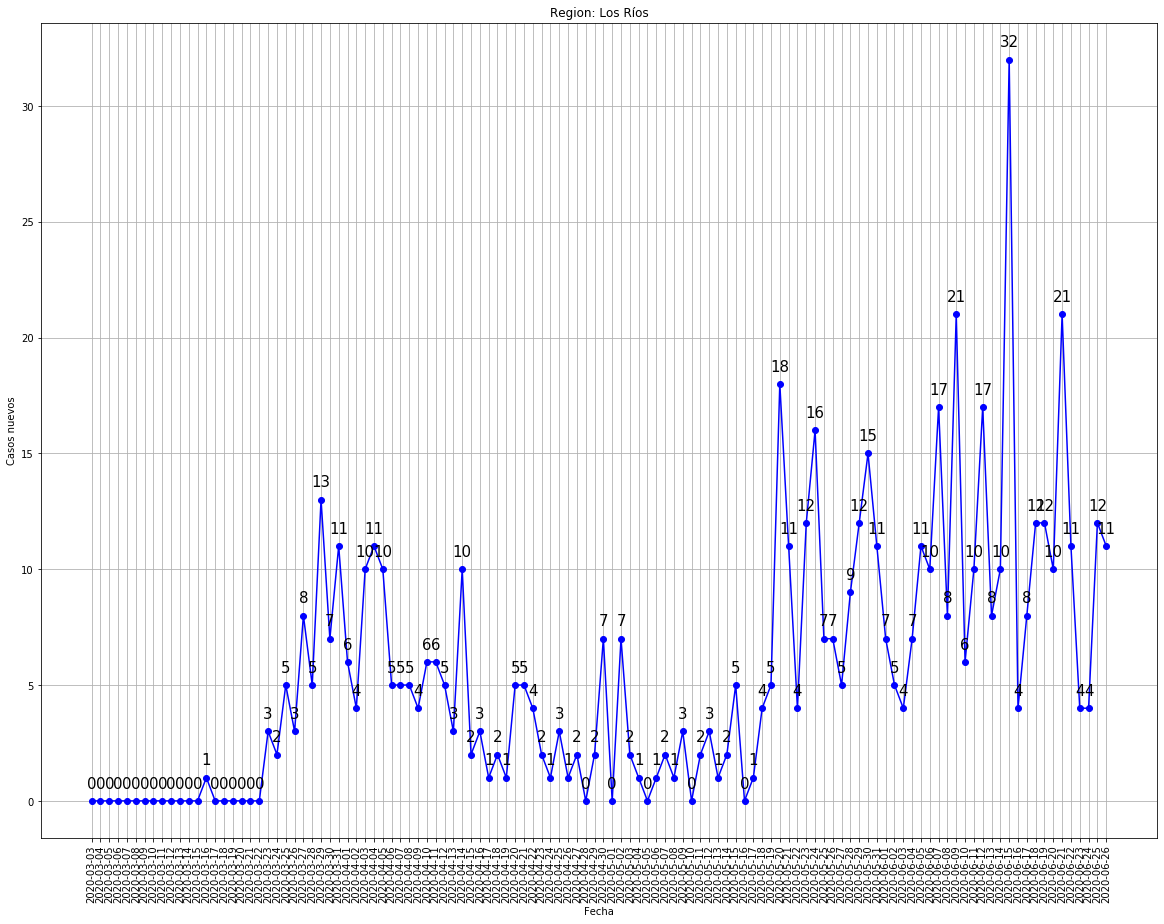

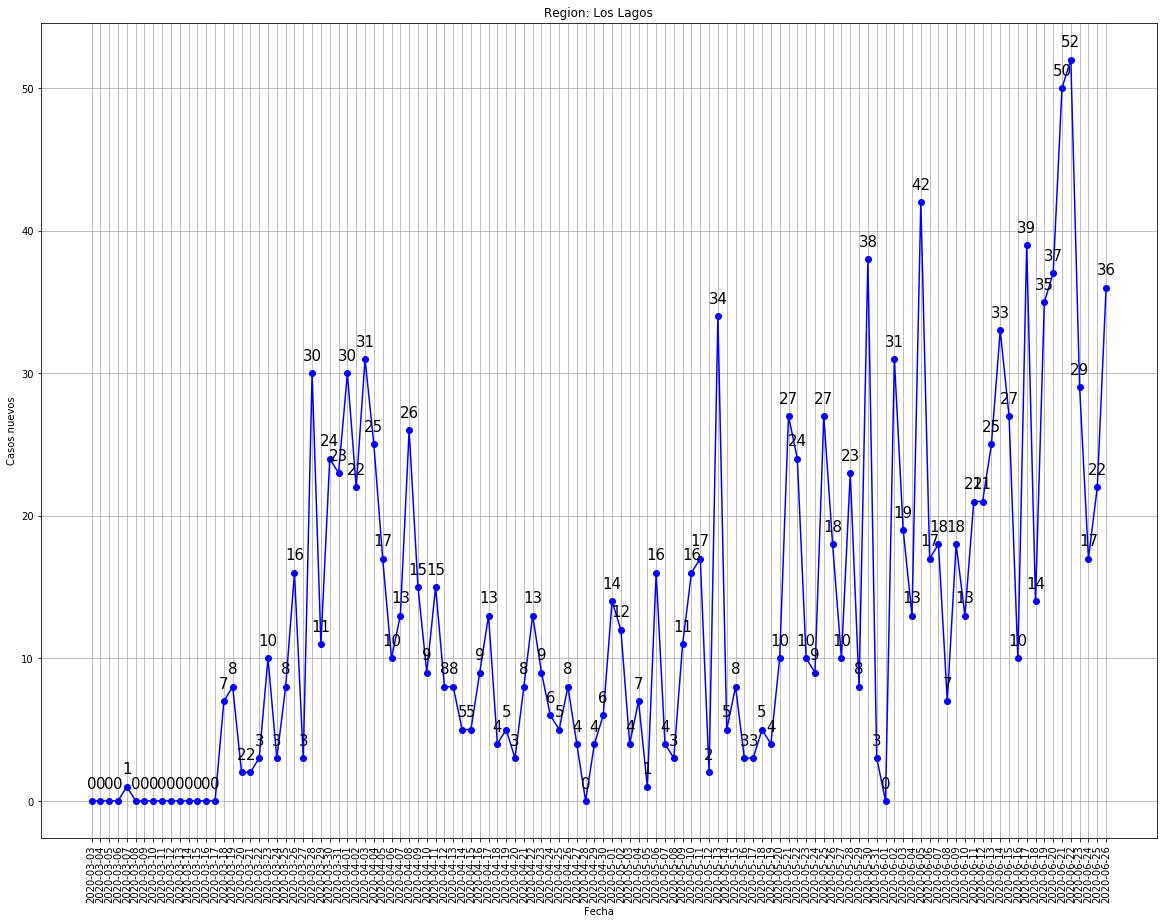

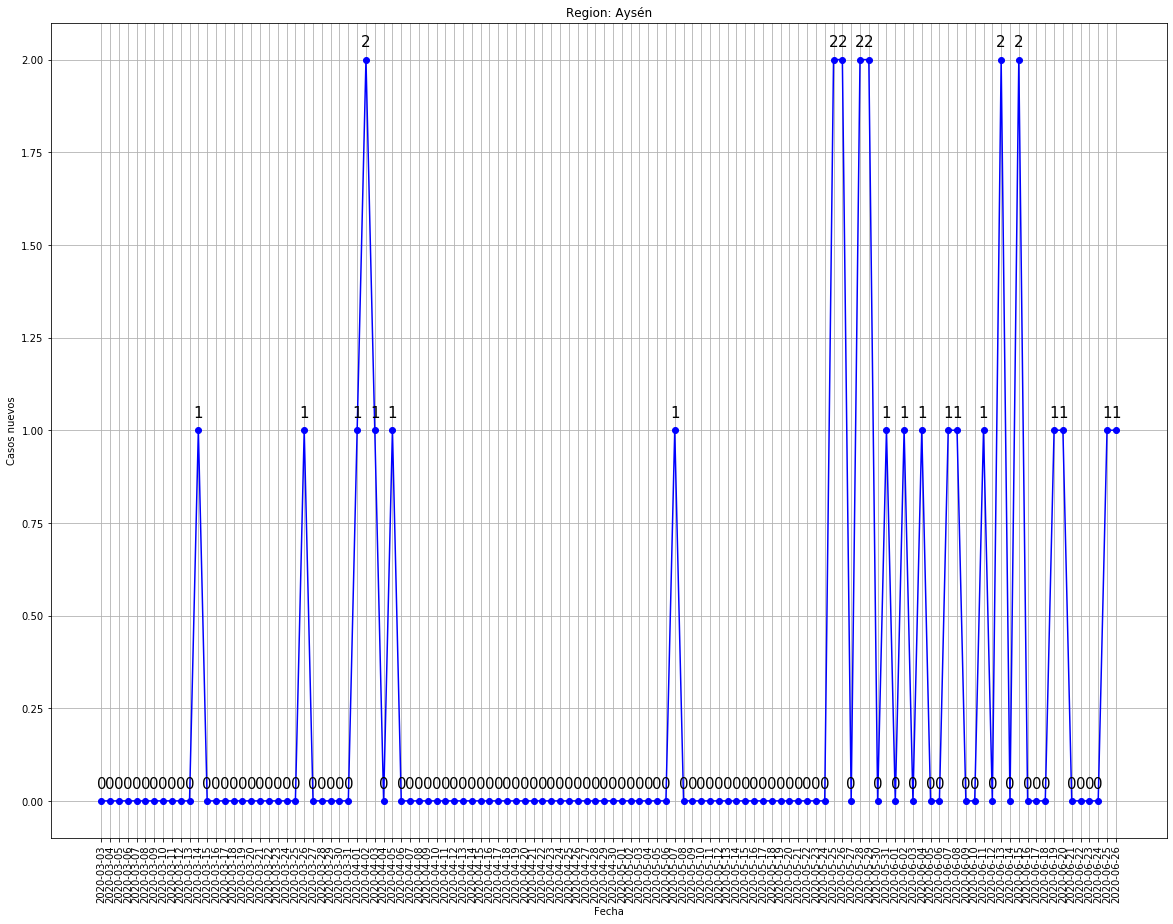

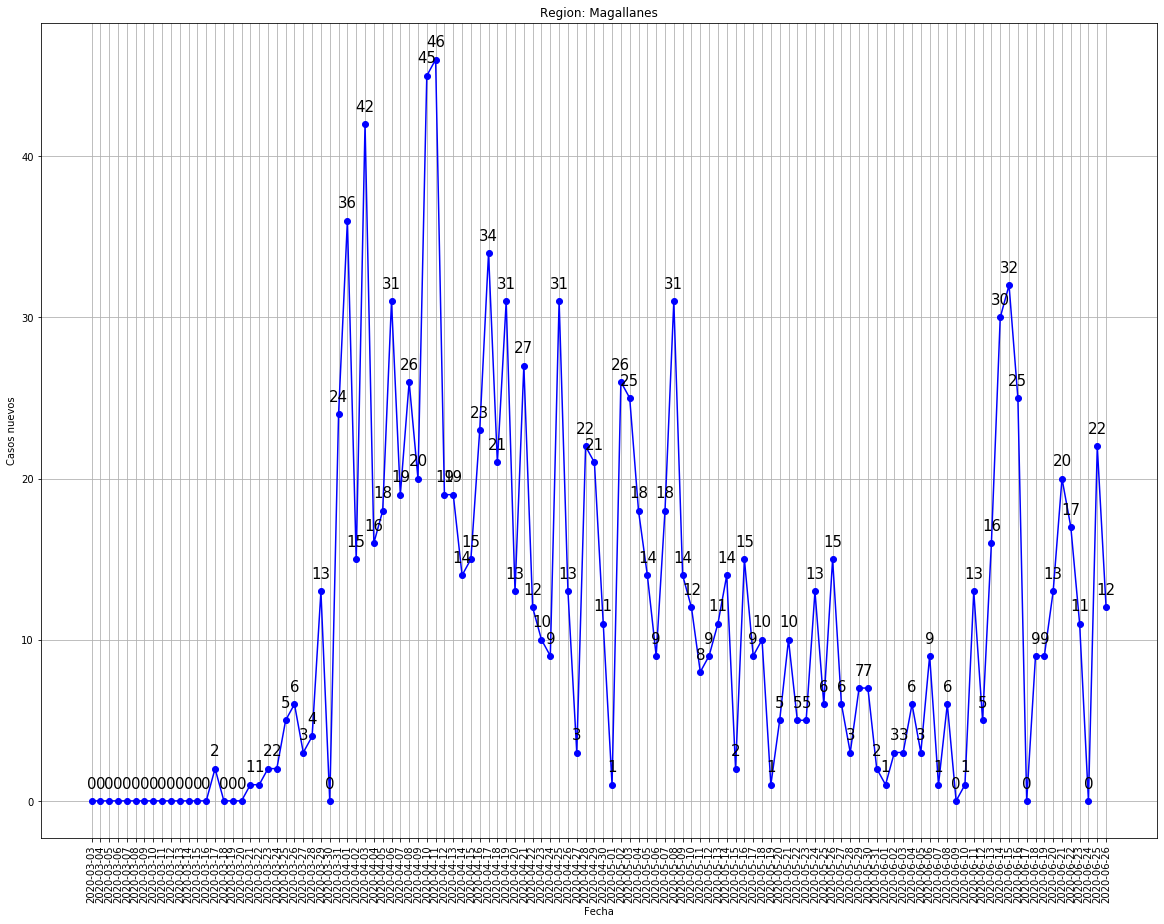

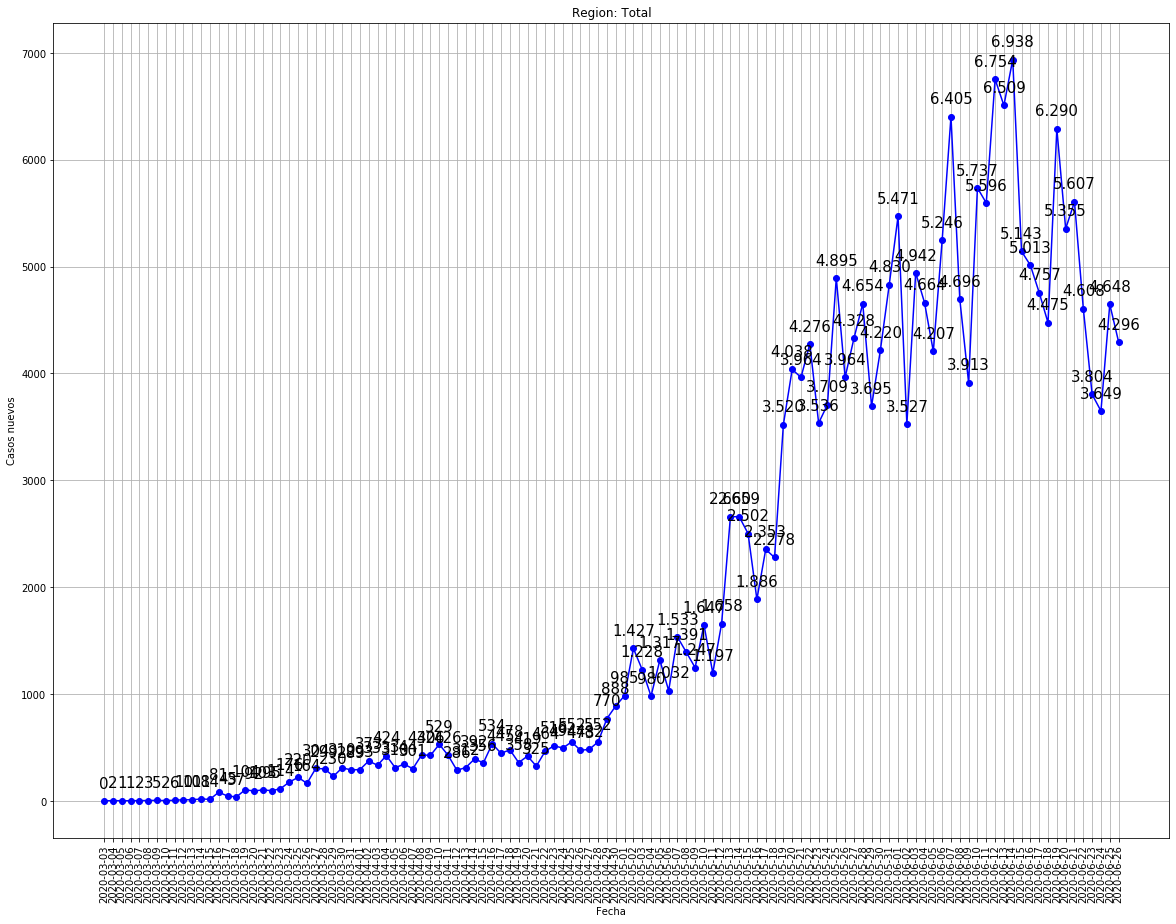

In [8]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph_for_days(region)

In [11]:
interact(graph_for_days,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…